In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

from sklearn.metrics import r2_score
from IPython.display import display

In [2]:
properties = [
    'pH',
    'OM',
    'Ca',
    'Mg',
    'K',
    'Na'
]

models = [
    'RF',
    'LASSO',
    'SVR',
    'PLSR6',    
    'LR',
#     'PLSR2',
]

scalers = [
    'wo_norm',
    'minmax',
    'standard'
]

satellites = [
#     'landsat_simulated',
#     'landsat_simulated_indices',
    'sentinel2_simulated',
    'sentinel2_simulated_indices',
    'sentinel2',
    'sentinel2_indices',
    'sentinel2_veggi',
    'sentinel2_veggi_indices',
#     'desis_simulated',
#     'vis_nir'
][::-1]

features = [
    'scE_d1_d2_fft_cr_',
    'scE_d1_d2_fft_',
    'scE_d1_d2_',
#     'scE_cr_',
#     'scE_d1_',
#     'scE_d2_',
#     'scE_fft_',
#     'scE_'
]
sns.set_theme(style="whitegrid")


In [3]:
def check_path(path):
    files = path.split('/')
    tmp_path = ''
    
    for file in files:
        tmp_path += f"{file}/"
#         print(tmp_path)
        if not os.path.exists(tmp_path):
            os.mkdir(tmp_path)


def join_results_unpivot_metrics(columns):
    all_df_temp_ = []

    for col in columns:
        col_ = list(df_temp.columns[:5])
        col_.extend([col])
        df_temp_ = df_temp[col_].copy()
        df_temp_['metric'] = col
        df_temp_.rename(columns={col:'result'}, inplace=True) 

        all_df_temp_.append(df_temp_)

    all_df_temp = pd.concat(all_df_temp_).reset_index(drop=True)
    
    return all_df_temp


def read_metrics(scaler, feature, property_):
    find_route = f"../reports/metrics/{scaler}/{feature}"

    df_temp = pd.read_csv(
        f"{find_route}/result_metrics_{property_}.csv",
        sep=';', decimal='.'
    )

    df_temp = df_temp[
        df_temp['Satellite'].isin(satellites) &
        df_temp['Model'].isin(models) &
        df_temp['Property'].isin(properties) &
        df_temp['Features'].isin(features)
    ]
    
    return df_temp


def filter_data(all_df_temp):
    all_df_temp_ = all_df_temp[
        all_df_temp['result'] >= 0
    ].sort_values(by=['result'], ascending=False)

    all_df_temp_2 = all_df_temp[
        all_df_temp['result'] < 0
    ].sort_values(by=['result'], ascending=False)
    
#     print(all_df_temp_[all_df_temp_['metric'] == 'R2 CV All'].shape)
    display(all_df_temp_[all_df_temp_['metric'] == 'R2 CV All'].head(3))
    print(all_df_temp_2.shape)
    display(all_df_temp_2.head(3))
    
    return all_df_temp_

scaler: wo_norm
feature: scE_d1_d2_fft_cr_
property_: pH


Satellite   Scaler           Features Property  Model  \
30  sentinel2_simulated_indices  wo_norm  scE_d1_d2_fft_cr_       pH     RF   
31  sentinel2_simulated_indices  wo_norm  scE_d1_d2_fft_cr_       pH  LASSO   
32  sentinel2_simulated_indices  wo_norm  scE_d1_d2_fft_cr_       pH  PLSR6   

    result     metric  
30   0.763  R2 CV All  
31   0.658  R2 CV All  
32   0.618  R2 CV All

(27, 7)


Satellite   Scaler           Features Property Model  \
15        sentinel2_indices  wo_norm  scE_d1_d2_fft_cr_       pH   SVR   
74                sentinel2  wo_norm  scE_d1_d2_fft_cr_       pH   SVR   
83  sentinel2_veggi_indices  wo_norm  scE_d1_d2_fft_cr_       pH   SVR   

    result        metric  
15  -0.005  R2 Train All  
74  -0.005   R2 Test All  
83  -0.012   R2 Test All

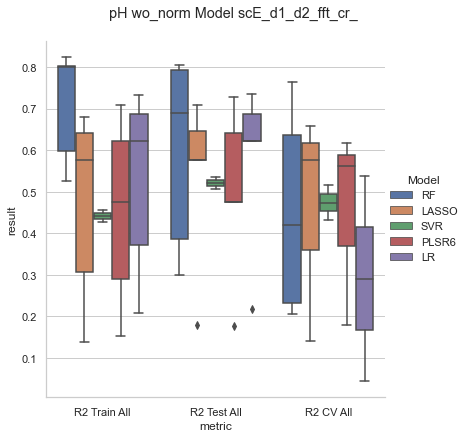

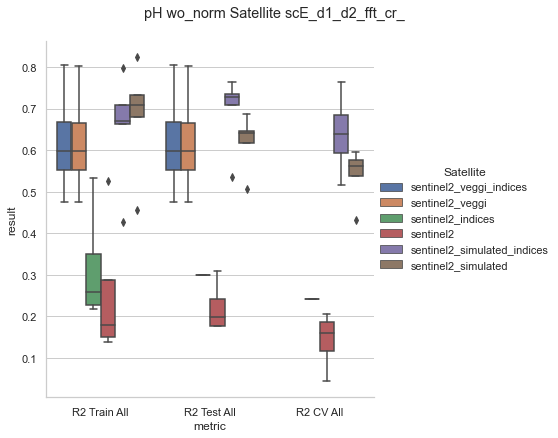

property_: OM


Satellite   Scaler           Features Property  Model  result  \
30  sentinel2_simulated  wo_norm  scE_d1_d2_fft_cr_       OM     LR   0.406   
31  sentinel2_simulated  wo_norm  scE_d1_d2_fft_cr_       OM     RF   0.368   
32  sentinel2_simulated  wo_norm  scE_d1_d2_fft_cr_       OM  LASSO   0.341   

       metric  
30  R2 CV All  
31  R2 CV All  
32  R2 CV All

(32, 7)


Satellite   Scaler           Features Property  Model  result  \
69  sentinel2_indices  wo_norm  scE_d1_d2_fft_cr_       OM  LASSO  -0.001   
12          sentinel2  wo_norm  scE_d1_d2_fft_cr_       OM    SVR  -0.012   
71          sentinel2  wo_norm  scE_d1_d2_fft_cr_       OM  LASSO  -0.016   

          metric  
69   R2 Test All  
12  R2 Train All  
71   R2 Test All

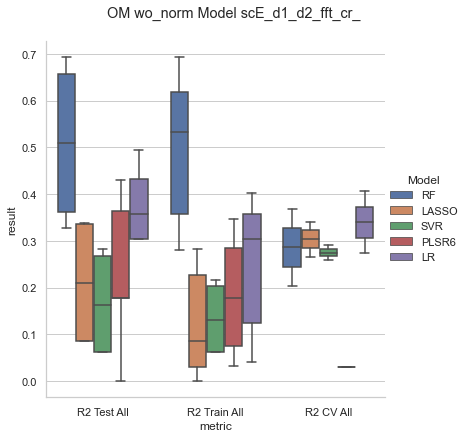

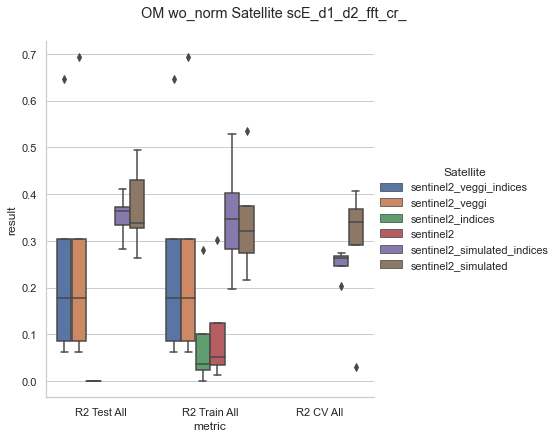

property_: Ca


Satellite   Scaler           Features Property  Model  \
30  sentinel2_simulated_indices  wo_norm  scE_d1_d2_fft_cr_       Ca     RF   
31  sentinel2_simulated_indices  wo_norm  scE_d1_d2_fft_cr_       Ca  LASSO   
32  sentinel2_simulated_indices  wo_norm  scE_d1_d2_fft_cr_       Ca  PLSR6   

    result     metric  
30   0.501  R2 CV All  
31   0.460  R2 CV All  
32   0.408  R2 CV All

(33, 7)


Satellite   Scaler           Features Property  Model  result  \
78  sentinel2_indices  wo_norm  scE_d1_d2_fft_cr_       Ca     LR  -0.035   
75  sentinel2_indices  wo_norm  scE_d1_d2_fft_cr_       Ca  PLSR6  -0.051   
40          sentinel2  wo_norm  scE_d1_d2_fft_cr_       Ca     RF  -0.072   

         metric  
78  R2 Test All  
75  R2 Test All  
40    R2 CV All

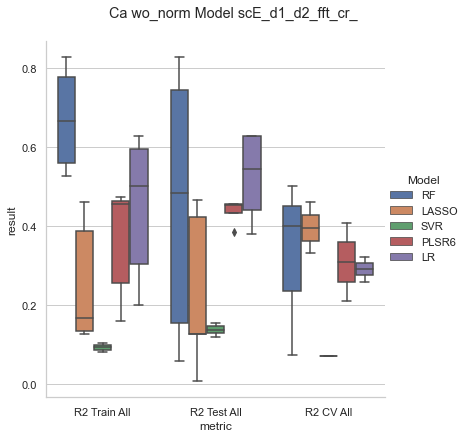

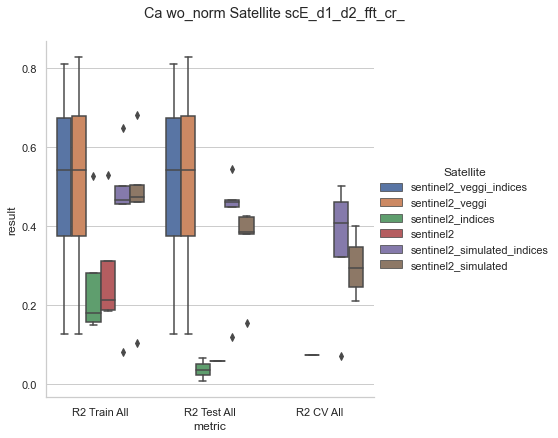

property_: Mg


Satellite   Scaler           Features Property  Model  \
30  sentinel2_simulated_indices  wo_norm  scE_d1_d2_fft_cr_       Mg  LASSO   
31          sentinel2_simulated  wo_norm  scE_d1_d2_fft_cr_       Mg  PLSR6   
32          sentinel2_simulated  wo_norm  scE_d1_d2_fft_cr_       Mg  LASSO   

    result     metric  
30   0.236  R2 CV All  
31   0.232  R2 CV All  
32   0.199  R2 CV All

(28, 7)


Satellite   Scaler           Features Property  Model  result  \
9   sentinel2_indices  wo_norm  scE_d1_d2_fft_cr_       Mg    SVR  -0.014   
81  sentinel2_indices  wo_norm  scE_d1_d2_fft_cr_       Mg  PLSR6  -0.019   
40          sentinel2  wo_norm  scE_d1_d2_fft_cr_       Mg  PLSR6  -0.034   

          metric  
9   R2 Train All  
81   R2 Test All  
40     R2 CV All

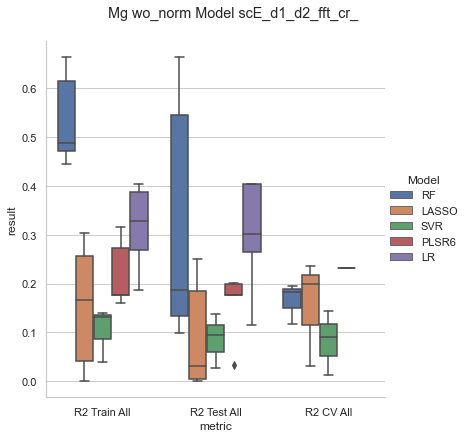

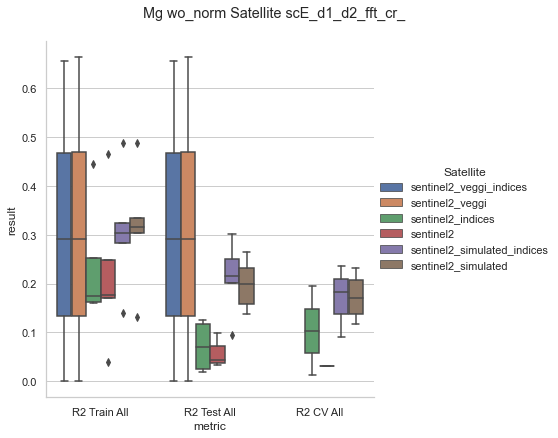

property_: K


Satellite   Scaler           Features Property Model  result  \
30          sentinel2  wo_norm  scE_d1_d2_fft_cr_        K   SVR   0.023   
31  sentinel2_indices  wo_norm  scE_d1_d2_fft_cr_        K   SVR   0.016   

       metric  
30  R2 CV All  
31  R2 CV All

(35, 7)


Satellite   Scaler           Features Property  Model  result  \
71          sentinel2  wo_norm  scE_d1_d2_fft_cr_        K     RF  -0.001   
61  sentinel2_indices  wo_norm  scE_d1_d2_fft_cr_        K    SVR  -0.002   
32  sentinel2_indices  wo_norm  scE_d1_d2_fft_cr_        K  LASSO  -0.003   

         metric  
71  R2 Test All  
61  R2 Test All  
32    R2 CV All

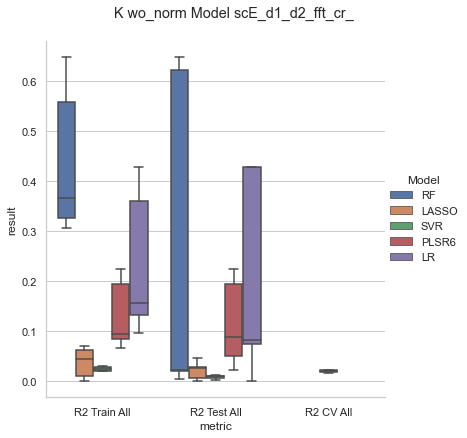

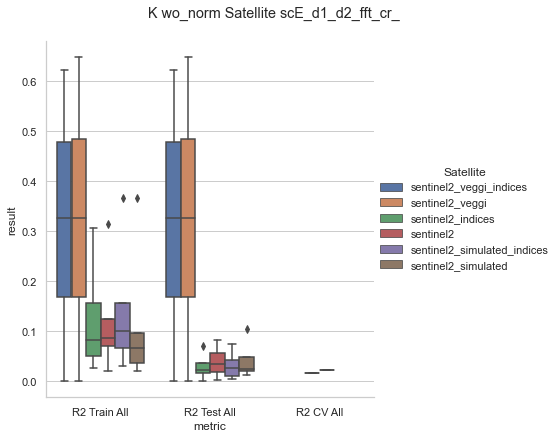

property_: Na


Satellite   Scaler           Features Property  Model  \
20                    sentinel2  wo_norm  scE_d1_d2_fft_cr_       Na     RF   
21          sentinel2_simulated  wo_norm  scE_d1_d2_fft_cr_       Na    SVR   
22  sentinel2_simulated_indices  wo_norm  scE_d1_d2_fft_cr_       Na  PLSR6   

    result     metric  
20   0.012  R2 CV All  
21   0.008  R2 CV All  
22   0.007  R2 CV All

(30, 7)


Satellite   Scaler           Features Property  Model  \
5   sentinel2_simulated_indices  wo_norm  scE_d1_d2_fft_cr_       Na    SVR   
24          sentinel2_simulated  wo_norm  scE_d1_d2_fft_cr_       Na  PLSR6   
57                    sentinel2  wo_norm  scE_d1_d2_fft_cr_       Na  LASSO   

    result        metric  
5   -0.002  R2 Train All  
24  -0.003     R2 CV All  
57  -0.003   R2 Test All

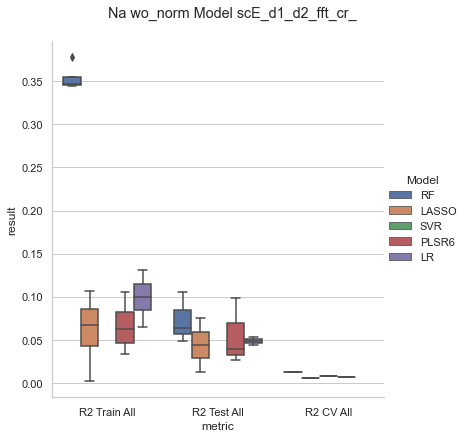

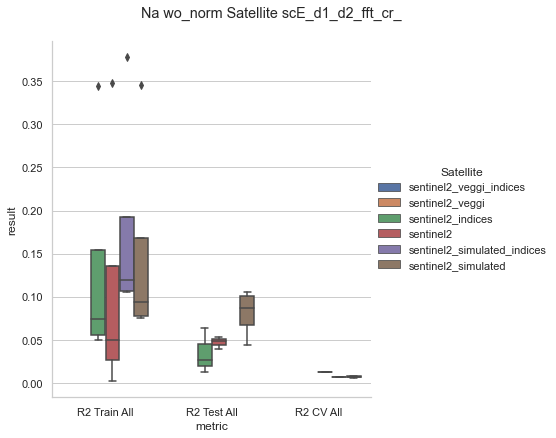

feature: scE_d1_d2_fft_
property_: pH


Satellite   Scaler        Features Property  Model  \
30          sentinel2_simulated  wo_norm  scE_d1_d2_fft_       pH  PLSR6   
31          sentinel2_simulated  wo_norm  scE_d1_d2_fft_       pH     LR   
32  sentinel2_simulated_indices  wo_norm  scE_d1_d2_fft_       pH     LR   

    result     metric  
30   0.681  R2 CV All  
31   0.658  R2 CV All  
32   0.632  R2 CV All

(20, 7)


Satellite   Scaler        Features Property Model  result  \
79        sentinel2_indices  wo_norm  scE_d1_d2_fft_       pH   SVR  -0.002   
46                sentinel2  wo_norm  scE_d1_d2_fft_       pH   SVR  -0.011   
83  sentinel2_veggi_indices  wo_norm  scE_d1_d2_fft_       pH   SVR  -0.013   

         metric  
79  R2 Test All  
46    R2 CV All  
83  R2 Test All

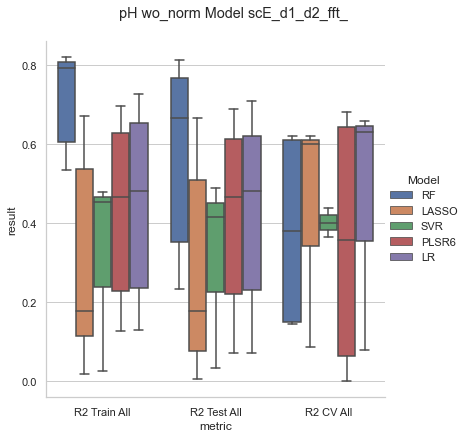

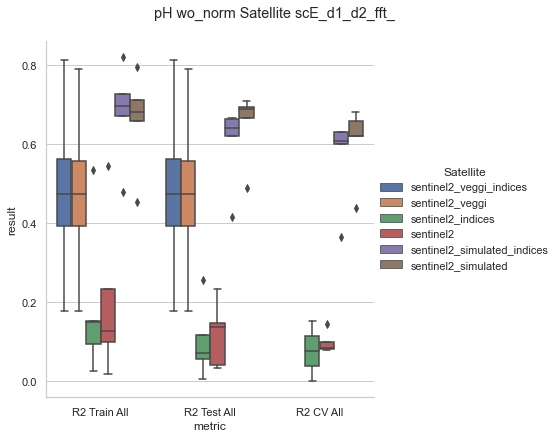

property_: OM


Satellite   Scaler        Features Property  Model  \
30          sentinel2_simulated  wo_norm  scE_d1_d2_fft_       OM     LR   
31  sentinel2_simulated_indices  wo_norm  scE_d1_d2_fft_       OM  PLSR6   
32  sentinel2_simulated_indices  wo_norm  scE_d1_d2_fft_       OM     LR   

    result     metric  
30   0.329  R2 CV All  
31   0.325  R2 CV All  
32   0.319  R2 CV All

(31, 7)


Satellite   Scaler        Features Property  Model  result       metric
72  sentinel2  wo_norm  scE_d1_d2_fft_       OM  LASSO  -0.004  R2 Test All
71  sentinel2  wo_norm  scE_d1_d2_fft_       OM    SVR  -0.007  R2 Test All
76  sentinel2  wo_norm  scE_d1_d2_fft_       OM     LR  -0.020  R2 Test All

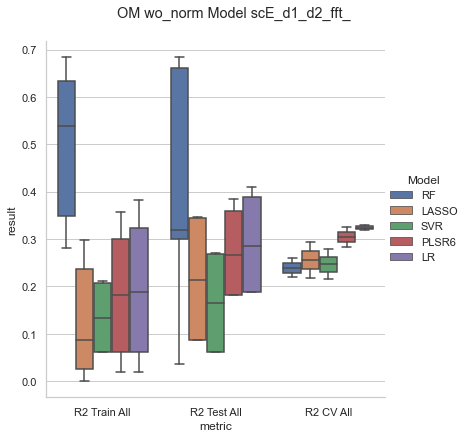

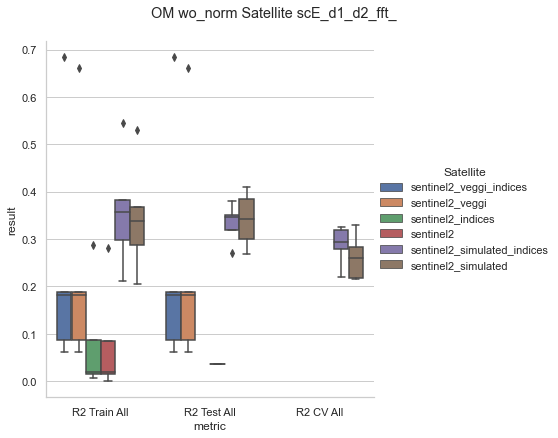

property_: Ca


Satellite   Scaler        Features Property  Model  \
30  sentinel2_simulated_indices  wo_norm  scE_d1_d2_fft_       Ca     RF   
31  sentinel2_simulated_indices  wo_norm  scE_d1_d2_fft_       Ca  LASSO   
32          sentinel2_simulated  wo_norm  scE_d1_d2_fft_       Ca     LR   

    result     metric  
30   0.500  R2 CV All  
31   0.424  R2 CV All  
32   0.407  R2 CV All

(32, 7)


Satellite   Scaler        Features Property  Model  \
39          sentinel2_simulated  wo_norm  scE_d1_d2_fft_       Ca    SVR   
71            sentinel2_indices  wo_norm  scE_d1_d2_fft_       Ca  LASSO   
40  sentinel2_simulated_indices  wo_norm  scE_d1_d2_fft_       Ca    SVR   

    result       metric  
39  -0.006    R2 CV All  
71  -0.039  R2 Test All  
40  -0.044    R2 CV All

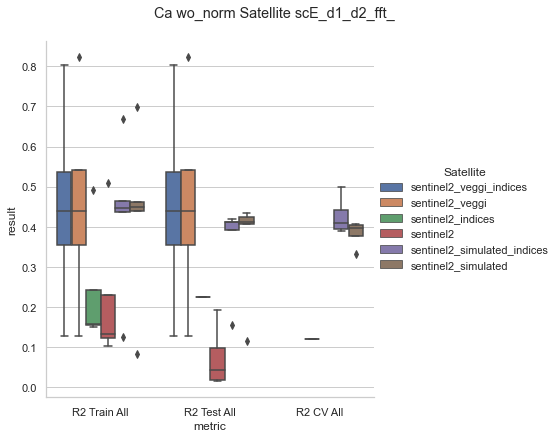

property_: Mg


Satellite   Scaler        Features Property  Model  \
30          sentinel2_simulated  wo_norm  scE_d1_d2_fft_       Mg  PLSR6   
31  sentinel2_simulated_indices  wo_norm  scE_d1_d2_fft_       Mg  LASSO   
32  sentinel2_simulated_indices  wo_norm  scE_d1_d2_fft_       Mg  PLSR6   

    result     metric  
30   0.188  R2 CV All  
31   0.185  R2 CV All  
32   0.184  R2 CV All

(29, 7)


Satellite   Scaler        Features Property  Model  result  \
40  sentinel2_indices  wo_norm  scE_d1_d2_fft_       Mg     RF  -0.003   
41          sentinel2  wo_norm  scE_d1_d2_fft_       Mg    SVR  -0.004   
42          sentinel2  wo_norm  scE_d1_d2_fft_       Mg  LASSO  -0.019   

       metric  
40  R2 CV All  
41  R2 CV All  
42  R2 CV All

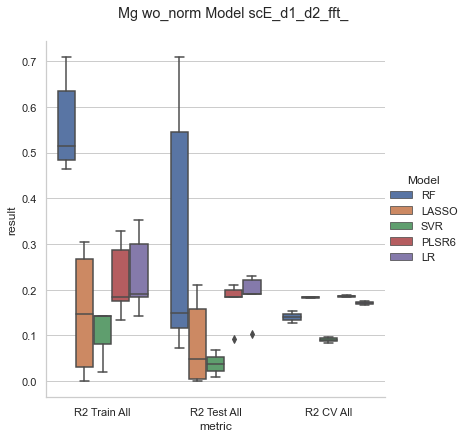

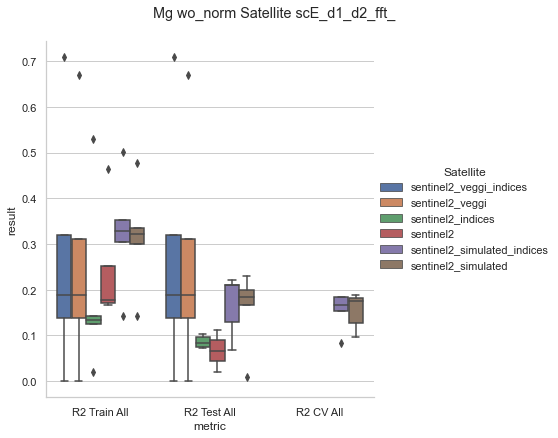

property_: K


Satellite   Scaler        Features Property  Model  result  \
30    sentinel2_indices  wo_norm  scE_d1_d2_fft_        K    SVR   0.032   
31    sentinel2_indices  wo_norm  scE_d1_d2_fft_        K     RF   0.024   
32  sentinel2_simulated  wo_norm  scE_d1_d2_fft_        K  LASSO   0.016   

       metric  
30  R2 CV All  
31  R2 CV All  
32  R2 CV All

(39, 7)


Satellite   Scaler        Features Property  Model  \
34            sentinel2_indices  wo_norm  scE_d1_d2_fft_        K  LASSO   
35            sentinel2_indices  wo_norm  scE_d1_d2_fft_        K  PLSR6   
79  sentinel2_simulated_indices  wo_norm  scE_d1_d2_fft_        K  PLSR6   

    result       metric  
34  -0.007    R2 CV All  
35  -0.007    R2 CV All  
79  -0.007  R2 Test All

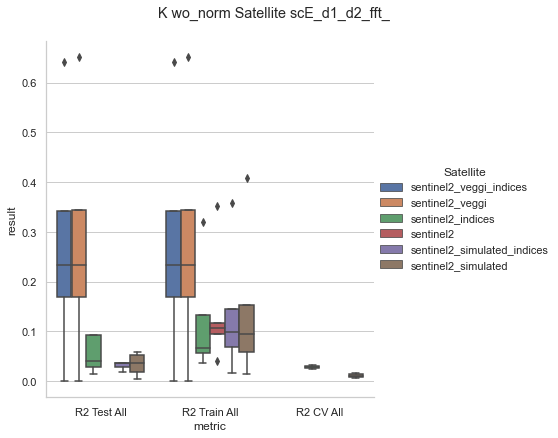

property_: Na


Satellite   Scaler        Features Property  Model  \
20  sentinel2_simulated_indices  wo_norm  scE_d1_d2_fft_       Na  PLSR6   
21  sentinel2_simulated_indices  wo_norm  scE_d1_d2_fft_       Na     RF   

    result     metric  
20   0.007  R2 CV All  
21   0.006  R2 CV All

(29, 7)


Satellite   Scaler        Features Property  Model  \
22  sentinel2_simulated_indices  wo_norm  scE_d1_d2_fft_       Na  LASSO   
3   sentinel2_simulated_indices  wo_norm  scE_d1_d2_fft_       Na    SVR   
57          sentinel2_simulated  wo_norm  scE_d1_d2_fft_       Na     RF   

    result        metric  
22  -0.003     R2 CV All  
3   -0.005  R2 Train All  
57  -0.007   R2 Test All

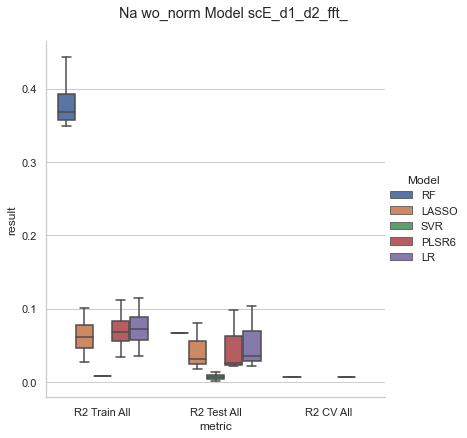

feature: scE_d1_d2_
property_: pH


Satellite   Scaler    Features Property  Model  result  \
30  sentinel2_simulated  wo_norm  scE_d1_d2_       pH     LR   0.698   
31  sentinel2_simulated  wo_norm  scE_d1_d2_       pH  PLSR6   0.696   
32  sentinel2_simulated  wo_norm  scE_d1_d2_       pH  LASSO   0.695   

       metric  
30  R2 CV All  
31  R2 CV All  
32  R2 CV All

(27, 7)


Satellite   Scaler    Features Property  Model  result  \
44  sentinel2_indices  wo_norm  scE_d1_d2_       pH  LASSO  -0.004   
45          sentinel2  wo_norm  scE_d1_d2_       pH     LR  -0.022   
79  sentinel2_indices  wo_norm  scE_d1_d2_       pH    SVR  -0.029   

         metric  
44    R2 CV All  
45    R2 CV All  
79  R2 Test All

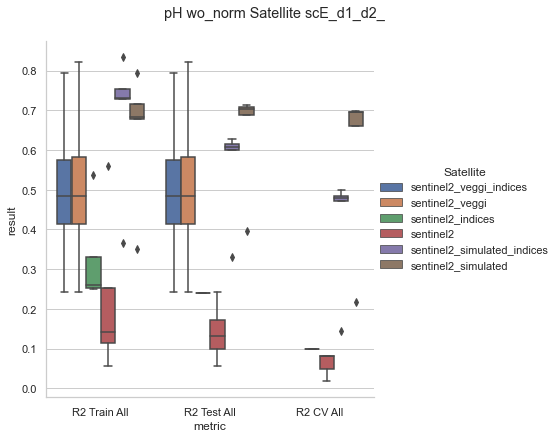

property_: OM


Satellite   Scaler    Features Property  Model  result  \
30  sentinel2_simulated  wo_norm  scE_d1_d2_       OM     LR   0.313   
31  sentinel2_simulated  wo_norm  scE_d1_d2_       OM  LASSO   0.299   
32  sentinel2_simulated  wo_norm  scE_d1_d2_       OM  PLSR6   0.285   

       metric  
30  R2 CV All  
31  R2 CV All  
32  R2 CV All

(32, 7)


Satellite   Scaler    Features Property  Model  result  \
72  sentinel2_indices  wo_norm  scE_d1_d2_       OM  LASSO  -0.003   
81  sentinel2_indices  wo_norm  scE_d1_d2_       OM     LR  -0.016   
75          sentinel2  wo_norm  scE_d1_d2_       OM     RF  -0.016   

         metric  
72  R2 Test All  
81  R2 Test All  
75  R2 Test All

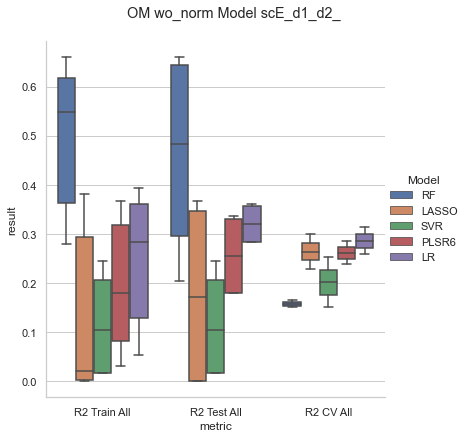

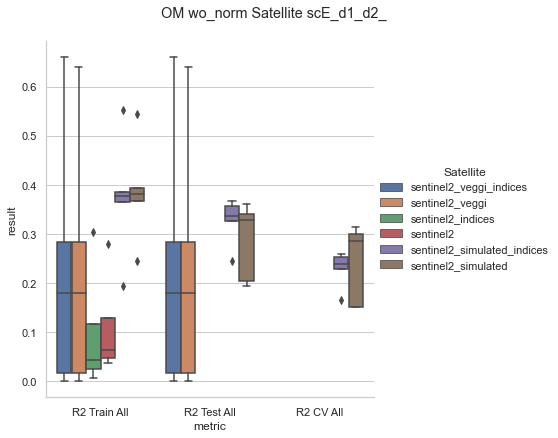

property_: Ca


Satellite   Scaler    Features Property  Model  result  \
30  sentinel2_simulated  wo_norm  scE_d1_d2_       Ca     LR   0.446   
31  sentinel2_simulated  wo_norm  scE_d1_d2_       Ca     RF   0.443   
32  sentinel2_simulated  wo_norm  scE_d1_d2_       Ca  PLSR6   0.441   

       metric  
30  R2 CV All  
31  R2 CV All  
32  R2 CV All

(36, 7)


Satellite   Scaler    Features Property Model  result  \
71  sentinel2_simulated_indices  wo_norm  scE_d1_d2_       Ca   SVR  -0.045   
39            sentinel2_indices  wo_norm  scE_d1_d2_       Ca    RF  -0.068   
11  sentinel2_simulated_indices  wo_norm  scE_d1_d2_       Ca   SVR  -0.104   

          metric  
71   R2 Test All  
39     R2 CV All  
11  R2 Train All

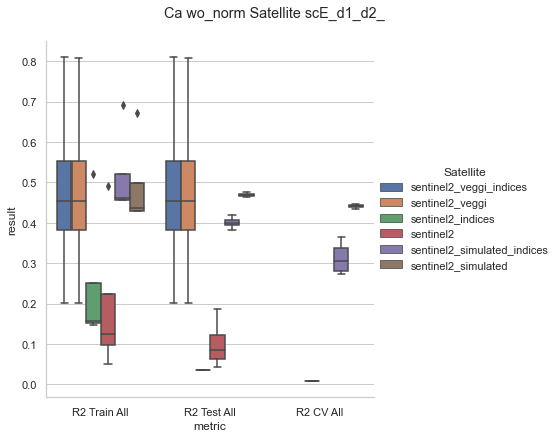

property_: Mg


Satellite   Scaler    Features Property  Model  result  \
30  sentinel2_simulated_indices  wo_norm  scE_d1_d2_       Mg  LASSO   0.244   
31  sentinel2_simulated_indices  wo_norm  scE_d1_d2_       Mg  PLSR6   0.243   
32  sentinel2_simulated_indices  wo_norm  scE_d1_d2_       Mg     LR   0.220   

       metric  
30  R2 CV All  
31  R2 CV All  
32  R2 CV All

(27, 7)


Satellite   Scaler    Features Property  Model  result  \
41          sentinel2  wo_norm  scE_d1_d2_       Mg     LR  -0.012   
74  sentinel2_indices  wo_norm  scE_d1_d2_       Mg  LASSO  -0.015   
42  sentinel2_indices  wo_norm  scE_d1_d2_       Mg     RF  -0.016   

         metric  
41    R2 CV All  
74  R2 Test All  
42    R2 CV All

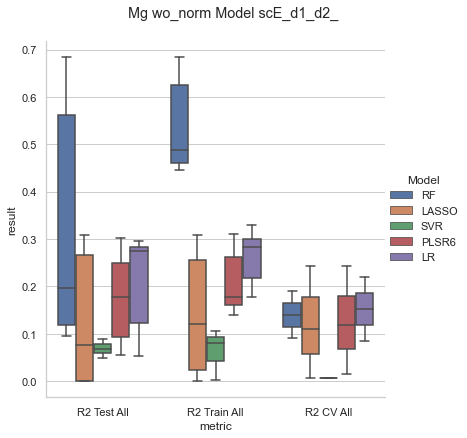

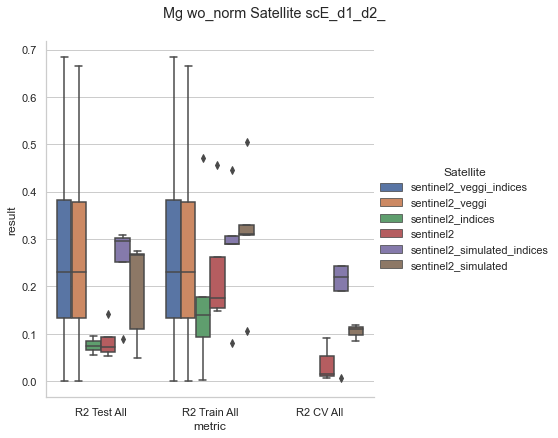

property_: K


Satellite   Scaler    Features Property  Model  result  \
30  sentinel2_simulated_indices  wo_norm  scE_d1_d2_        K     LR   0.078   
31  sentinel2_simulated_indices  wo_norm  scE_d1_d2_        K  PLSR6   0.078   
32  sentinel2_simulated_indices  wo_norm  scE_d1_d2_        K  LASSO   0.070   

       metric  
30  R2 CV All  
31  R2 CV All  
32  R2 CV All

(38, 7)


Satellite   Scaler    Features Property Model  result  \
34    sentinel2_indices  wo_norm  scE_d1_d2_        K   SVR  -0.011   
65  sentinel2_simulated  wo_norm  scE_d1_d2_        K   SVR  -0.011   
35  sentinel2_simulated  wo_norm  scE_d1_d2_        K   SVR  -0.012   

         metric  
34    R2 CV All  
65  R2 Test All  
35    R2 CV All

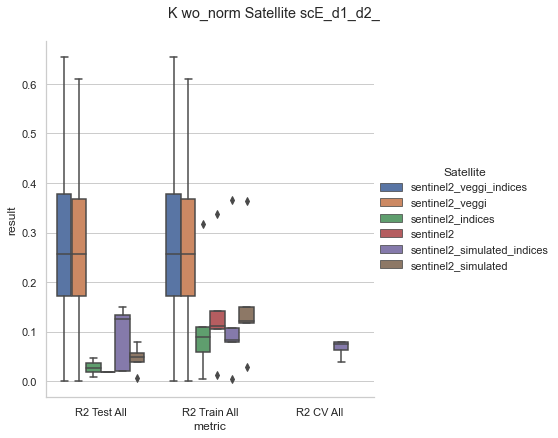

property_: Na


Empty DataFrame
Columns: [Satellite, Scaler, Features, Property, Model, result, metric]
Index: []

(38, 7)


Satellite   Scaler    Features Property  Model  result  \
48            sentinel2  wo_norm  scE_d1_d2_       Na  LASSO  -0.003   
56            sentinel2  wo_norm  scE_d1_d2_       Na  PLSR6  -0.006   
3   sentinel2_simulated  wo_norm  scE_d1_d2_       Na    SVR  -0.015   

          metric  
48   R2 Test All  
56   R2 Test All  
3   R2 Train All

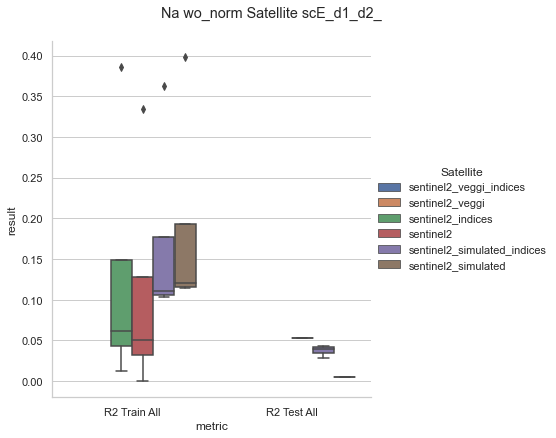

scaler: minmax
feature: scE_d1_d2_fft_cr_
property_: pH


Satellite  Scaler           Features Property  Model  \
30  sentinel2_simulated_indices  minmax  scE_d1_d2_fft_cr_       pH  LASSO   
31  sentinel2_simulated_indices  minmax  scE_d1_d2_fft_cr_       pH    SVR   
33          sentinel2_simulated  minmax  scE_d1_d2_fft_cr_       pH    SVR   

    result     metric  
30   0.662  R2 CV All  
31   0.648  R2 CV All  
33   0.642  R2 CV All

(16, 7)


Satellite  Scaler           Features Property  Model  result  \
45  sentinel2_indices  minmax  scE_d1_d2_fft_cr_       pH  PLSR6  -0.060   
46  sentinel2_indices  minmax  scE_d1_d2_fft_cr_       pH    SVR  -0.083   
79  sentinel2_indices  minmax  scE_d1_d2_fft_cr_       pH     LR  -0.114   

         metric  
45    R2 CV All  
46    R2 CV All  
79  R2 Test All

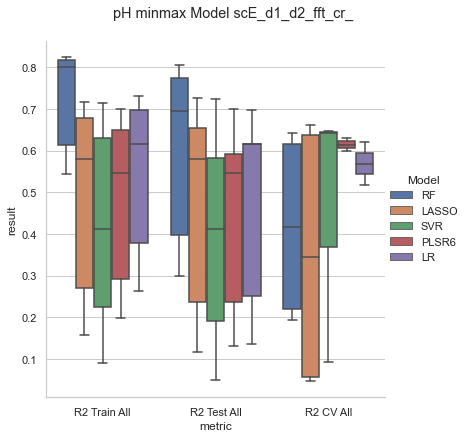

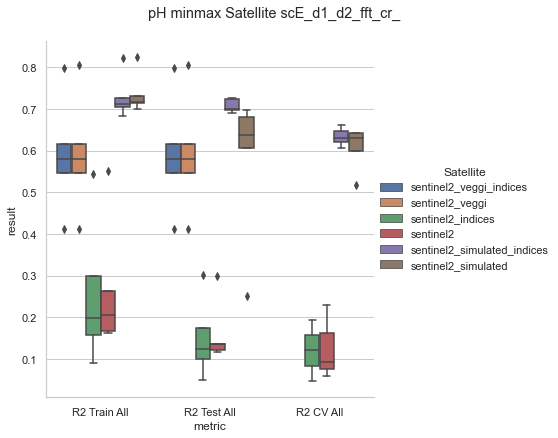

property_: OM


Satellite  Scaler           Features Property  Model  \
30  sentinel2_simulated_indices  minmax  scE_d1_d2_fft_cr_       OM    SVR   
31          sentinel2_simulated  minmax  scE_d1_d2_fft_cr_       OM     RF   
32  sentinel2_simulated_indices  minmax  scE_d1_d2_fft_cr_       OM  LASSO   

    result     metric  
30   0.263  R2 CV All  
31   0.224  R2 CV All  
32   0.196  R2 CV All

(31, 7)


Satellite  Scaler           Features Property  Model  result  \
71  sentinel2_indices  minmax  scE_d1_d2_fft_cr_       OM  LASSO  -0.001   
68          sentinel2  minmax  scE_d1_d2_fft_cr_       OM  LASSO  -0.003   
75  sentinel2_indices  minmax  scE_d1_d2_fft_cr_       OM     RF  -0.016   

         metric  
71  R2 Test All  
68  R2 Test All  
75  R2 Test All

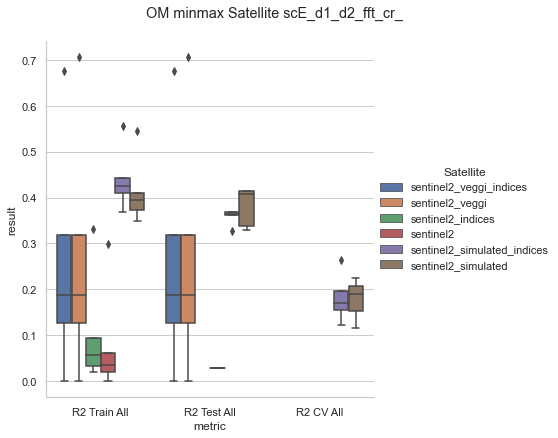

property_: Ca


Satellite  Scaler           Features Property  Model  \
30  sentinel2_simulated_indices  minmax  scE_d1_d2_fft_cr_       Ca     RF   
31          sentinel2_simulated  minmax  scE_d1_d2_fft_cr_       Ca  PLSR6   
32          sentinel2_simulated  minmax  scE_d1_d2_fft_cr_       Ca  LASSO   

    result     metric  
30   0.379  R2 CV All  
31   0.307  R2 CV All  
32   0.302  R2 CV All

(16, 7)


Satellite  Scaler           Features Property  Model  result  \
45  sentinel2_indices  minmax  scE_d1_d2_fft_cr_       Ca  PLSR6  -0.035   
46          sentinel2  minmax  scE_d1_d2_fft_cr_       Ca     RF  -0.043   
79  sentinel2_indices  minmax  scE_d1_d2_fft_cr_       Ca     LR  -0.083   

         metric  
45    R2 CV All  
46    R2 CV All  
79  R2 Test All

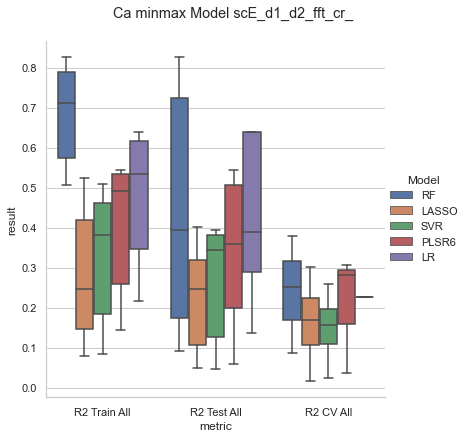

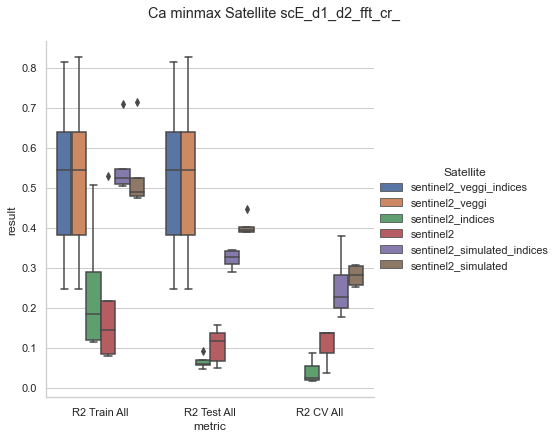

property_: Mg


Satellite  Scaler           Features Property  Model  \
30  sentinel2_simulated_indices  minmax  scE_d1_d2_fft_cr_       Mg  PLSR6   
31  sentinel2_simulated_indices  minmax  scE_d1_d2_fft_cr_       Mg  LASSO   
32  sentinel2_simulated_indices  minmax  scE_d1_d2_fft_cr_       Mg    SVR   

    result     metric  
30   0.319  R2 CV All  
31   0.315  R2 CV All  
32   0.251  R2 CV All

(23, 7)


Satellite  Scaler           Features Property Model  result  \
87  sentinel2_indices  minmax  scE_d1_d2_fft_cr_       Mg    LR  -0.013   
38          sentinel2  minmax  scE_d1_d2_fft_cr_       Mg    RF  -0.022   
39          sentinel2  minmax  scE_d1_d2_fft_cr_       Mg   SVR  -0.049   

         metric  
87  R2 Test All  
38    R2 CV All  
39    R2 CV All

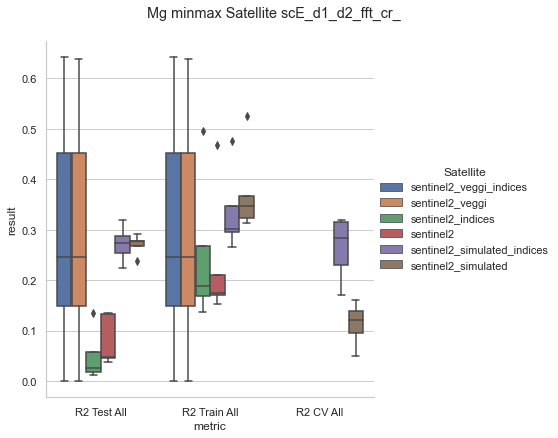

property_: K


Satellite  Scaler           Features Property  Model  result  \
30  sentinel2_simulated  minmax  scE_d1_d2_fft_cr_        K  LASSO   0.017   

       metric  
30  R2 CV All

(35, 7)


Satellite  Scaler           Features Property  Model  result  \
75    sentinel2_indices  minmax  scE_d1_d2_fft_cr_        K     RF  -0.001   
69  sentinel2_simulated  minmax  scE_d1_d2_fft_cr_        K     RF  -0.006   
31            sentinel2  minmax  scE_d1_d2_fft_cr_        K  LASSO  -0.024   

         metric  
75  R2 Test All  
69  R2 Test All  
31    R2 CV All

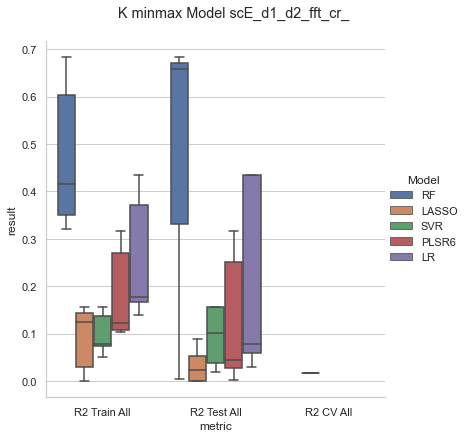

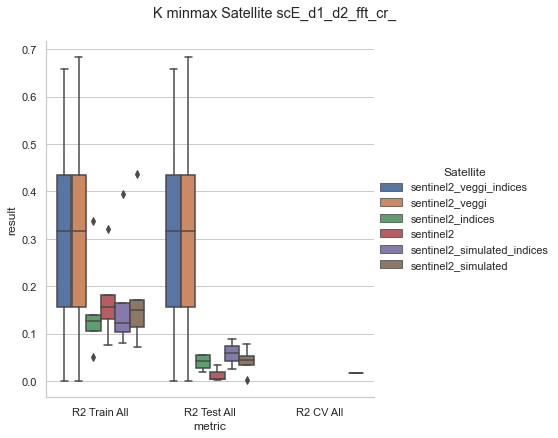

property_: Na


Satellite  Scaler           Features Property Model  result  \
20  sentinel2_simulated  minmax  scE_d1_d2_fft_cr_       Na   SVR   0.050   
21  sentinel2_simulated  minmax  scE_d1_d2_fft_cr_       Na    RF   0.002   

       metric  
20  R2 CV All  
21  R2 CV All

(24, 7)


Satellite  Scaler           Features Property  Model  result  \
22  sentinel2_simulated  minmax  scE_d1_d2_fft_cr_       Na  LASSO  -0.002   
50    sentinel2_indices  minmax  scE_d1_d2_fft_cr_       Na  PLSR6  -0.003   
47            sentinel2  minmax  scE_d1_d2_fft_cr_       Na  PLSR6  -0.004   

         metric  
22    R2 CV All  
50  R2 Test All  
47  R2 Test All

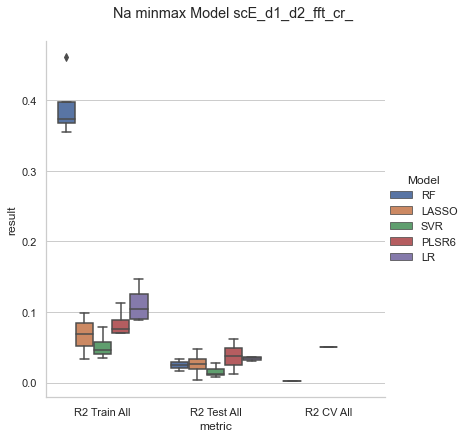

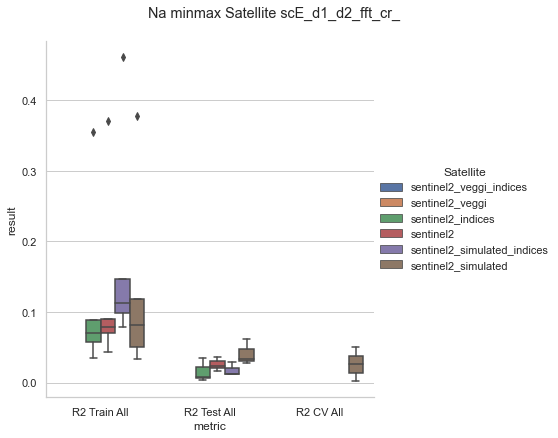

feature: scE_d1_d2_fft_
property_: pH


Satellite  Scaler        Features Property  Model  \
30  sentinel2_simulated_indices  minmax  scE_d1_d2_fft_       pH  LASSO   
31  sentinel2_simulated_indices  minmax  scE_d1_d2_fft_       pH  PLSR6   
32  sentinel2_simulated_indices  minmax  scE_d1_d2_fft_       pH     RF   

    result     metric  
30   0.749  R2 CV All  
31   0.745  R2 CV All  
32   0.744  R2 CV All

(10, 7)


Satellite  Scaler        Features Property Model  result  \
50          sentinel2_veggi  minmax  scE_d1_d2_fft_       pH   SVR  -0.833   
51  sentinel2_veggi_indices  minmax  scE_d1_d2_fft_       pH   SVR  -0.833   
52  sentinel2_veggi_indices  minmax  scE_d1_d2_fft_       pH    RF  -1.153   

       metric  
50  R2 CV All  
51  R2 CV All  
52  R2 CV All

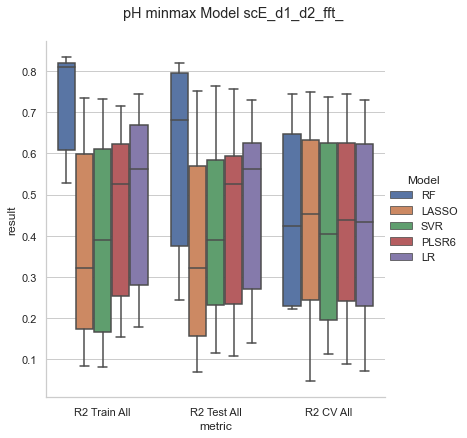

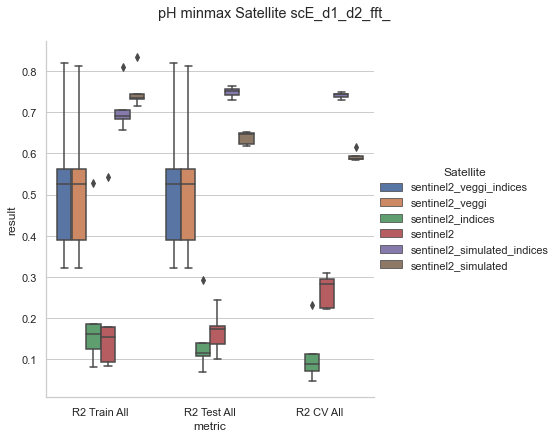

property_: OM


Satellite  Scaler        Features Property  Model  \
30  sentinel2_simulated_indices  minmax  scE_d1_d2_fft_       OM    SVR   
31  sentinel2_simulated_indices  minmax  scE_d1_d2_fft_       OM  LASSO   
32          sentinel2_simulated  minmax  scE_d1_d2_fft_       OM    SVR   

    result     metric  
30   0.332  R2 CV All  
31   0.317  R2 CV All  
32   0.307  R2 CV All

(29, 7)


Satellite  Scaler        Features Property  Model  result  \
72          sentinel2  minmax  scE_d1_d2_fft_       OM  LASSO  -0.001   
78  sentinel2_indices  minmax  scE_d1_d2_fft_       OM  PLSR6  -0.002   
76          sentinel2  minmax  scE_d1_d2_fft_       OM  PLSR6  -0.007   

         metric  
72  R2 Test All  
78  R2 Test All  
76  R2 Test All

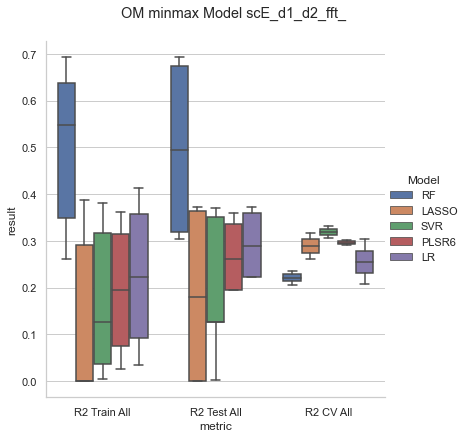

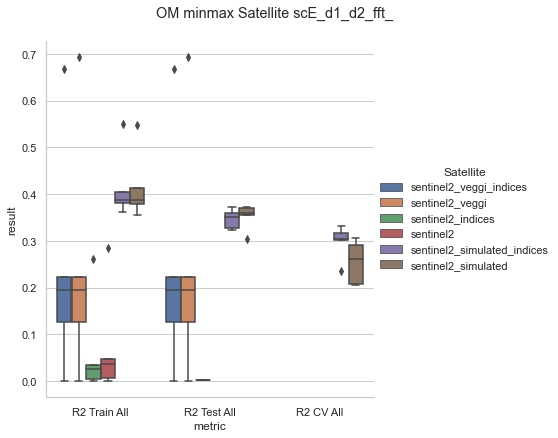

property_: Ca


Satellite  Scaler        Features Property  Model  \
30  sentinel2_simulated_indices  minmax  scE_d1_d2_fft_       Ca     RF   
31          sentinel2_simulated  minmax  scE_d1_d2_fft_       Ca  PLSR6   
32  sentinel2_simulated_indices  minmax  scE_d1_d2_fft_       Ca     LR   

    result     metric  
30   0.428  R2 CV All  
31   0.348  R2 CV All  
32   0.331  R2 CV All

(22, 7)


Satellite  Scaler        Features Property  Model  result  \
41          sentinel2  minmax  scE_d1_d2_fft_       Ca    SVR  -0.005   
77  sentinel2_indices  minmax  scE_d1_d2_fft_       Ca  LASSO  -0.009   
80  sentinel2_indices  minmax  scE_d1_d2_fft_       Ca     LR  -0.013   

         metric  
41    R2 CV All  
77  R2 Test All  
80  R2 Test All

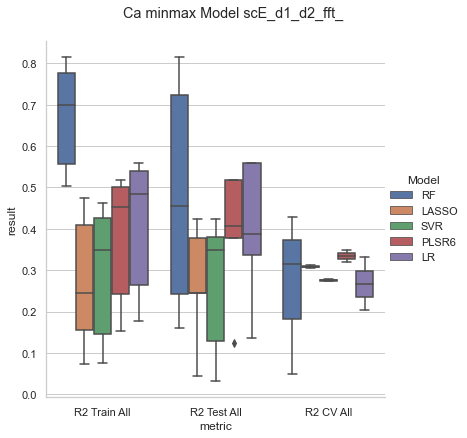

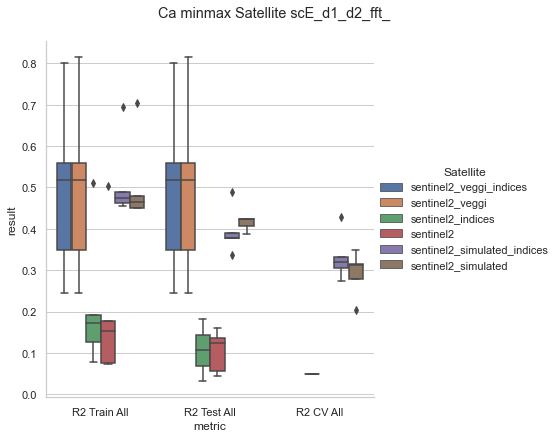

property_: Mg


Satellite  Scaler        Features Property  Model  \
30  sentinel2_simulated_indices  minmax  scE_d1_d2_fft_       Mg  LASSO   
31  sentinel2_simulated_indices  minmax  scE_d1_d2_fft_       Mg  PLSR6   
32  sentinel2_simulated_indices  minmax  scE_d1_d2_fft_       Mg     LR   

    result     metric  
30   0.235  R2 CV All  
31   0.227  R2 CV All  
32   0.207  R2 CV All

(18, 7)


Satellite  Scaler        Features Property  Model  result  \
76  sentinel2_indices  minmax  scE_d1_d2_fft_       Mg  LASSO  -0.011   
44  sentinel2_indices  minmax  scE_d1_d2_fft_       Mg     RF  -0.014   
78  sentinel2_indices  minmax  scE_d1_d2_fft_       Mg  PLSR6  -0.032   

         metric  
76  R2 Test All  
44    R2 CV All  
78  R2 Test All

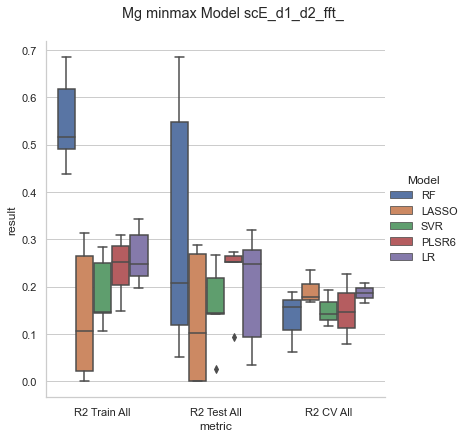

property_: K


Satellite  Scaler        Features Property Model  result  \
30  sentinel2_indices  minmax  scE_d1_d2_fft_        K    LR     0.0   

       metric  
30  R2 CV All

(33, 7)


Satellite  Scaler        Features Property Model  \
75          sentinel2_simulated  minmax  scE_d1_d2_fft_        K    RF   
31            sentinel2_indices  minmax  scE_d1_d2_fft_        K   SVR   
76  sentinel2_simulated_indices  minmax  scE_d1_d2_fft_        K    LR   

    result       metric  
75  -0.002  R2 Test All  
31  -0.011    R2 CV All  
76  -0.011  R2 Test All

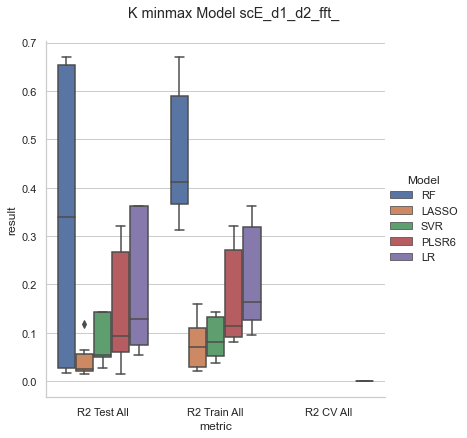

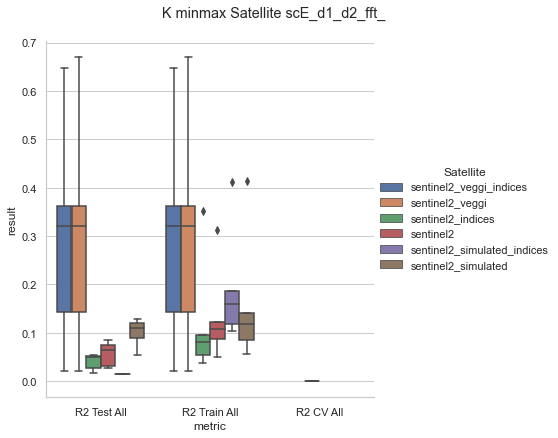

property_: Na


Empty DataFrame
Columns: [Satellite, Scaler, Features, Property, Model, result, metric]
Index: []

(26, 7)


Satellite  Scaler        Features Property  Model  result  \
40  sentinel2_indices  minmax  scE_d1_d2_fft_       Na    SVR  -0.008   
20  sentinel2_indices  minmax  scE_d1_d2_fft_       Na    SVR  -0.018   
21  sentinel2_indices  minmax  scE_d1_d2_fft_       Na  PLSR6  -0.019   

         metric  
40  R2 Test All  
20    R2 CV All  
21    R2 CV All

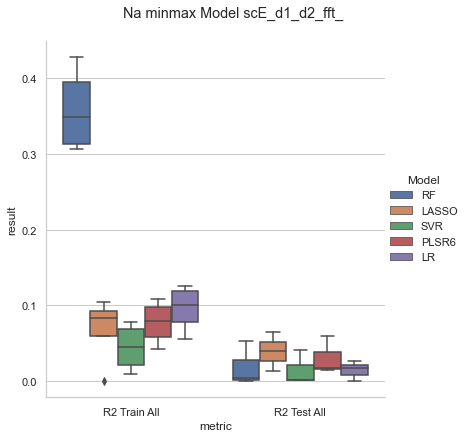

feature: scE_d1_d2_
property_: pH


Satellite  Scaler    Features Property  Model  result  \
30  sentinel2_simulated_indices  minmax  scE_d1_d2_       pH  LASSO   0.660   
31  sentinel2_simulated_indices  minmax  scE_d1_d2_       pH     LR   0.658   
33          sentinel2_simulated  minmax  scE_d1_d2_       pH     LR   0.647   

       metric  
30  R2 CV All  
31  R2 CV All  
33  R2 CV All

(11, 7)


Satellite  Scaler    Features Property Model  result  \
49        sentinel2_indices  minmax  scE_d1_d2_       pH    LR  -0.005   
50          sentinel2_veggi  minmax  scE_d1_d2_       pH   SVR  -0.825   
51  sentinel2_veggi_indices  minmax  scE_d1_d2_       pH   SVR  -0.825   

       metric  
49  R2 CV All  
50  R2 CV All  
51  R2 CV All

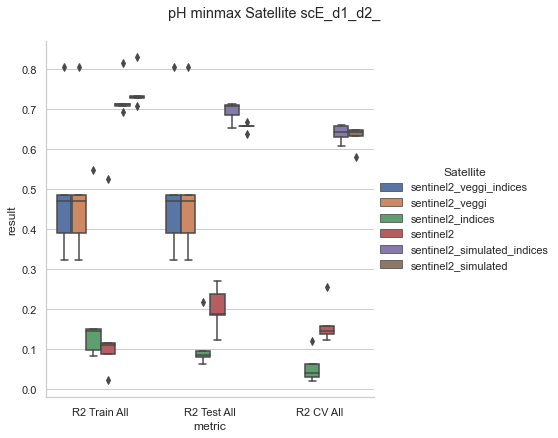

property_: OM


Satellite  Scaler    Features Property  Model  result     metric
30  sentinel2_simulated  minmax  scE_d1_d2_       OM  LASSO   0.320  R2 CV All
31  sentinel2_simulated  minmax  scE_d1_d2_       OM     LR   0.319  R2 CV All
32  sentinel2_simulated  minmax  scE_d1_d2_       OM    SVR   0.310  R2 CV All

(30, 7)


Satellite  Scaler    Features Property  Model  result       metric
70  sentinel2  minmax  scE_d1_d2_       OM  LASSO  -0.001  R2 Test All
40  sentinel2  minmax  scE_d1_d2_       OM  LASSO  -0.034    R2 CV All
71  sentinel2  minmax  scE_d1_d2_       OM     RF  -0.047  R2 Test All

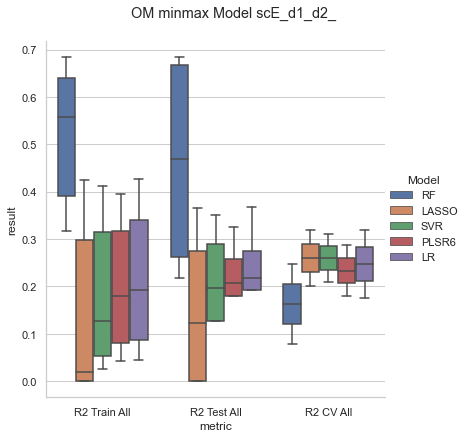

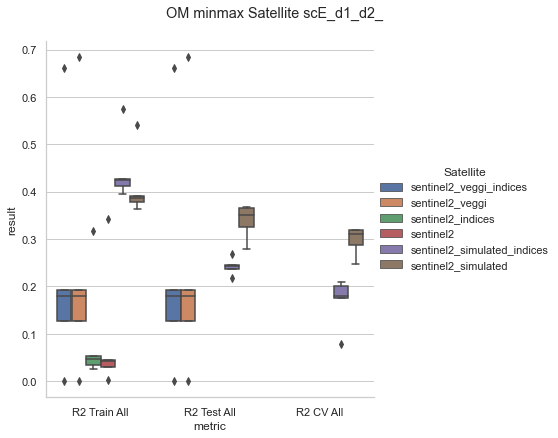

property_: Ca


Satellite  Scaler    Features Property  Model  result  \
30  sentinel2_simulated_indices  minmax  scE_d1_d2_       Ca  LASSO   0.416   
31  sentinel2_simulated_indices  minmax  scE_d1_d2_       Ca  PLSR6   0.409   
32  sentinel2_simulated_indices  minmax  scE_d1_d2_       Ca     LR   0.391   

       metric  
30  R2 CV All  
31  R2 CV All  
32  R2 CV All

(18, 7)


Satellite  Scaler    Features Property Model  result     metric
42  sentinel2_indices  minmax  scE_d1_d2_       Ca    LR  -0.044  R2 CV All
43          sentinel2  minmax  scE_d1_d2_       Ca    RF  -0.066  R2 CV All
44          sentinel2  minmax  scE_d1_d2_       Ca   SVR  -0.095  R2 CV All

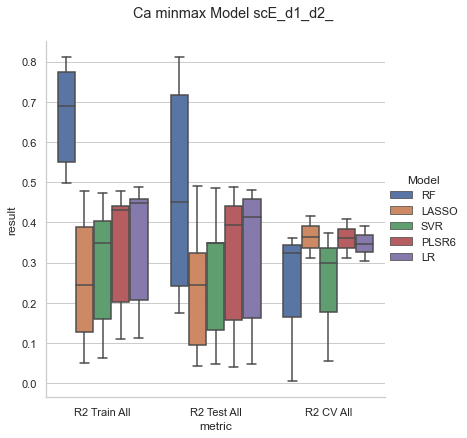

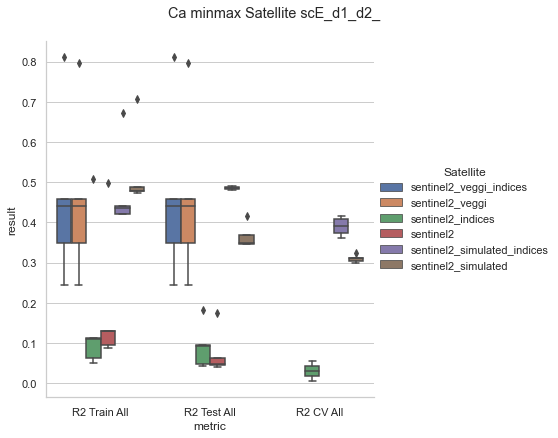

property_: Mg


Satellite  Scaler    Features Property  Model  result  \
30  sentinel2_simulated_indices  minmax  scE_d1_d2_       Mg  PLSR6   0.211   
31  sentinel2_simulated_indices  minmax  scE_d1_d2_       Mg     LR   0.210   
32  sentinel2_simulated_indices  minmax  scE_d1_d2_       Mg  LASSO   0.174   

       metric  
30  R2 CV All  
31  R2 CV All  
32  R2 CV All

(15, 7)


Satellite  Scaler    Features Property  Model  result     metric
45  sentinel2_simulated  minmax  scE_d1_d2_       Mg     RF  -0.026  R2 CV All
46    sentinel2_indices  minmax  scE_d1_d2_       Mg  PLSR6  -0.027  R2 CV All
47    sentinel2_indices  minmax  scE_d1_d2_       Mg     LR  -0.050  R2 CV All

property_: K


Empty DataFrame
Columns: [Satellite, Scaler, Features, Property, Model, result, metric]
Index: []

(35, 7)


Satellite  Scaler    Features Property  Model  result       metric
80          sentinel2  minmax  scE_d1_d2_        K    SVR  -0.002  R2 Test All
62  sentinel2_indices  minmax  scE_d1_d2_        K  LASSO  -0.018  R2 Test All
67  sentinel2_indices  minmax  scE_d1_d2_        K    SVR  -0.027  R2 Test All

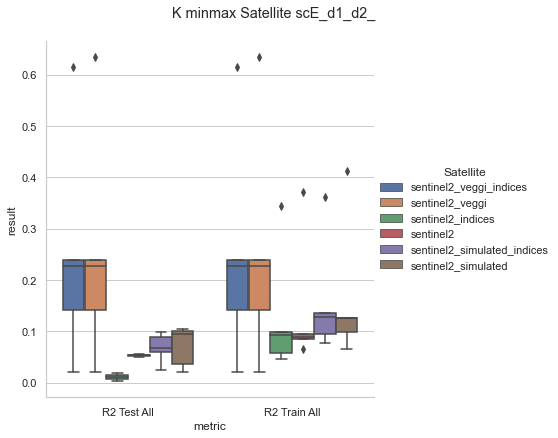

property_: Na


Satellite  Scaler    Features Property Model  result     metric
20  sentinel2_indices  minmax  scE_d1_d2_       Na   SVR   0.002  R2 CV All

(22, 7)


Satellite  Scaler    Features Property  Model  result  \
49            sentinel2_indices  minmax  scE_d1_d2_       Na  LASSO  -0.004   
21  sentinel2_simulated_indices  minmax  scE_d1_d2_       Na     RF  -0.014   
58            sentinel2_indices  minmax  scE_d1_d2_       Na     RF  -0.019   

         metric  
49  R2 Test All  
21    R2 CV All  
58  R2 Test All

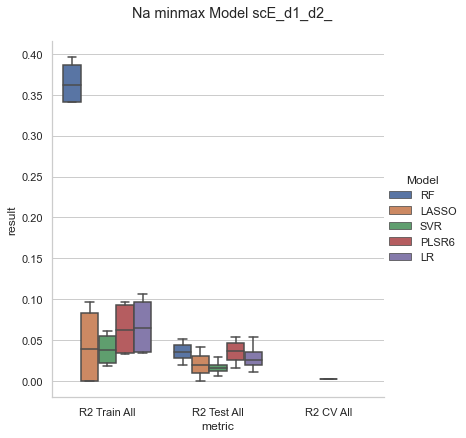

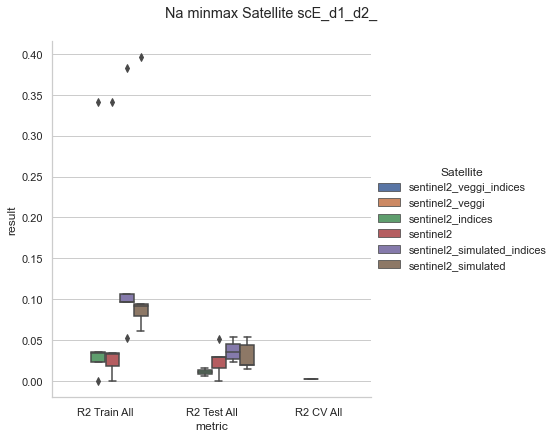

scaler: standard
feature: scE_d1_d2_fft_cr_
property_: pH


Satellite    Scaler           Features Property  Model  result  \
31  sentinel2_simulated  standard  scE_d1_d2_fft_cr_       pH    SVR   0.652   
30  sentinel2_simulated  standard  scE_d1_d2_fft_cr_       pH  LASSO   0.652   
32  sentinel2_simulated  standard  scE_d1_d2_fft_cr_       pH     RF   0.643   

       metric  
31  R2 CV All  
30  R2 CV All  
32  R2 CV All

(13, 7)


Satellite    Scaler           Features Property Model  result  \
77          sentinel2  standard  scE_d1_d2_fft_cr_       pH   SVR  -0.119   
48          sentinel2  standard  scE_d1_d2_fft_cr_       pH    LR  -0.326   
49  sentinel2_indices  standard  scE_d1_d2_fft_cr_       pH    LR  -0.938   

         metric  
77  R2 Test All  
48    R2 CV All  
49    R2 CV All

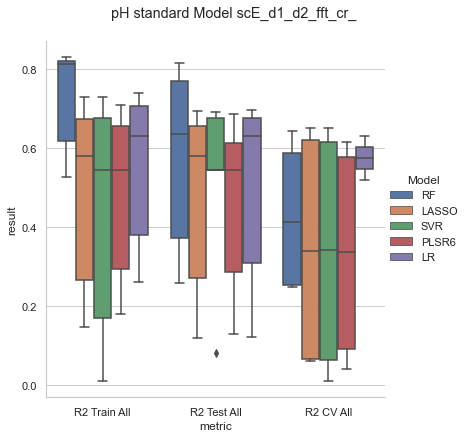

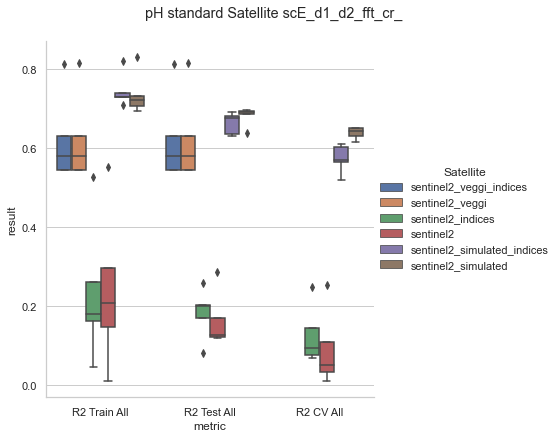

property_: OM


Satellite    Scaler           Features Property  Model  \
30  sentinel2_simulated_indices  standard  scE_d1_d2_fft_cr_       OM    SVR   
31          sentinel2_simulated  standard  scE_d1_d2_fft_cr_       OM  LASSO   
32  sentinel2_simulated_indices  standard  scE_d1_d2_fft_cr_       OM  LASSO   

    result     metric  
30   0.289  R2 CV All  
31   0.256  R2 CV All  
32   0.254  R2 CV All

(29, 7)


Satellite    Scaler           Features Property  Model  result  \
70  sentinel2_indices  standard  scE_d1_d2_fft_cr_       OM  LASSO  -0.001   
18          sentinel2  standard  scE_d1_d2_fft_cr_       OM    SVR  -0.008   
78          sentinel2  standard  scE_d1_d2_fft_cr_       OM    SVR  -0.023   

          metric  
70   R2 Test All  
18  R2 Train All  
78   R2 Test All

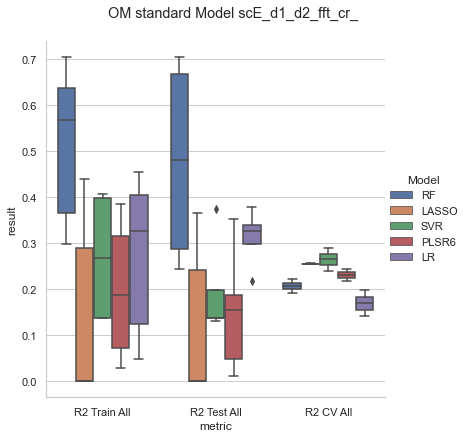

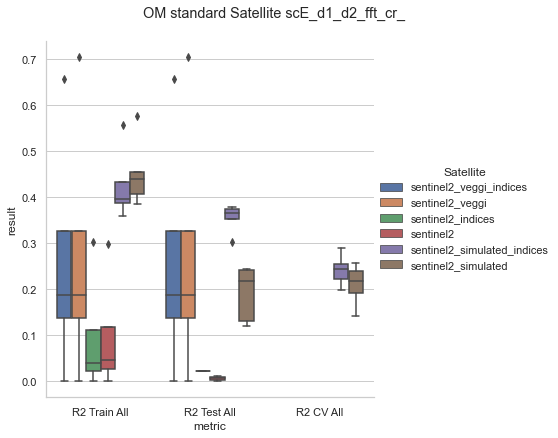

property_: Ca


Satellite    Scaler           Features Property  Model  \
30  sentinel2_simulated_indices  standard  scE_d1_d2_fft_cr_       Ca    SVR   
31          sentinel2_simulated  standard  scE_d1_d2_fft_cr_       Ca     RF   
32          sentinel2_simulated  standard  scE_d1_d2_fft_cr_       Ca  LASSO   

    result     metric  
30   0.399  R2 CV All  
31   0.397  R2 CV All  
32   0.380  R2 CV All

(17, 7)


Satellite    Scaler           Features Property  Model  result  \
44  sentinel2_simulated  standard  scE_d1_d2_fft_cr_       Ca     LR  -0.005   
79    sentinel2_indices  standard  scE_d1_d2_fft_cr_       Ca     LR  -0.060   
45    sentinel2_indices  standard  scE_d1_d2_fft_cr_       Ca  LASSO  -0.255   

         metric  
44    R2 CV All  
79  R2 Test All  
45    R2 CV All

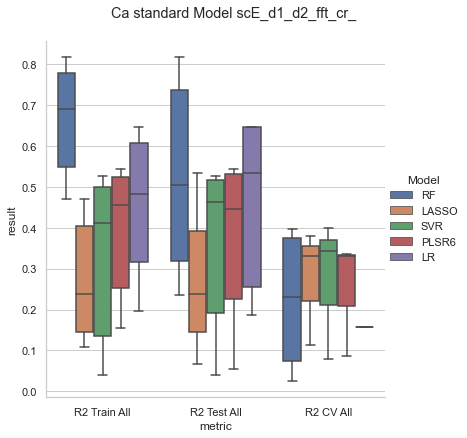

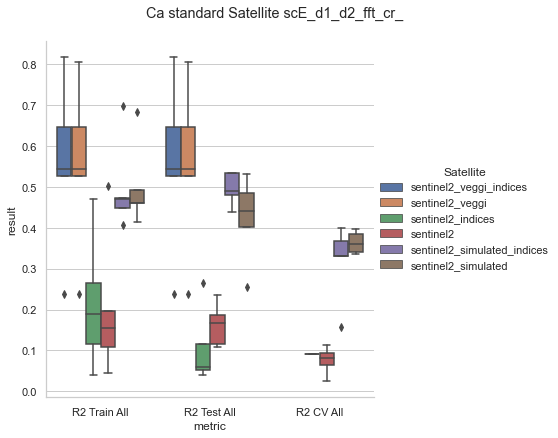

property_: Mg


Satellite    Scaler           Features Property  Model  \
30  sentinel2_simulated_indices  standard  scE_d1_d2_fft_cr_       Mg  PLSR6   
31  sentinel2_simulated_indices  standard  scE_d1_d2_fft_cr_       Mg  LASSO   
32  sentinel2_simulated_indices  standard  scE_d1_d2_fft_cr_       Mg    SVR   

    result     metric  
30   0.314  R2 CV All  
31   0.268  R2 CV All  
32   0.253  R2 CV All

(18, 7)


Satellite    Scaler           Features Property  Model  result  \
77  sentinel2  standard  scE_d1_d2_fft_cr_       Mg    SVR  -0.026   
44  sentinel2  standard  scE_d1_d2_fft_cr_       Mg  PLSR6  -0.040   
45  sentinel2  standard  scE_d1_d2_fft_cr_       Mg  LASSO  -0.076   

         metric  
77  R2 Test All  
44    R2 CV All  
45    R2 CV All

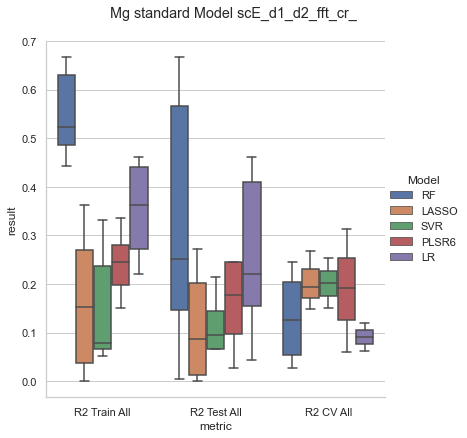

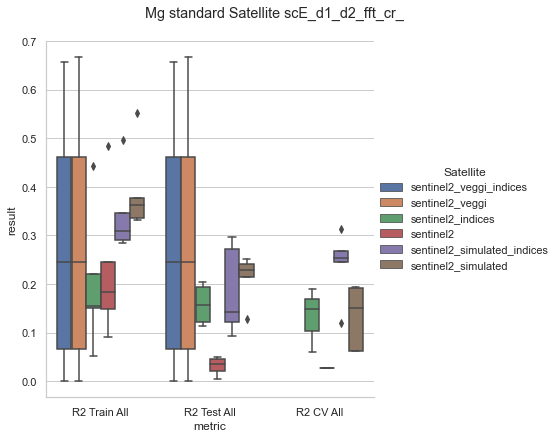

property_: K


Satellite    Scaler           Features Property  Model  \
30  sentinel2_simulated_indices  standard  scE_d1_d2_fft_cr_        K    SVR   
31  sentinel2_simulated_indices  standard  scE_d1_d2_fft_cr_        K  PLSR6   
32  sentinel2_simulated_indices  standard  scE_d1_d2_fft_cr_        K  LASSO   

    result     metric  
30   0.097  R2 CV All  
31   0.068  R2 CV All  
32   0.065  R2 CV All

(37, 7)


Satellite    Scaler           Features Property Model  \
84            sentinel2_indices  standard  scE_d1_d2_fft_cr_        K    LR   
34          sentinel2_simulated  standard  scE_d1_d2_fft_cr_        K    RF   
35  sentinel2_simulated_indices  standard  scE_d1_d2_fft_cr_        K    RF   

    result       metric  
84  -0.011  R2 Test All  
34  -0.026    R2 CV All  
35  -0.028    R2 CV All

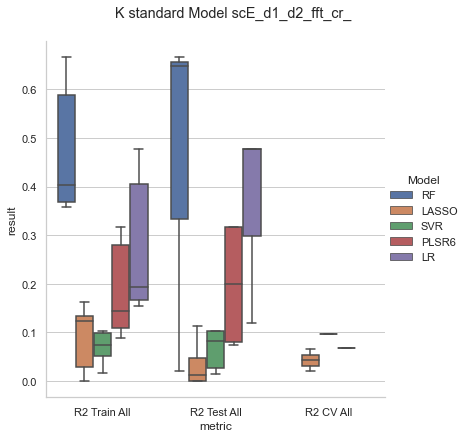

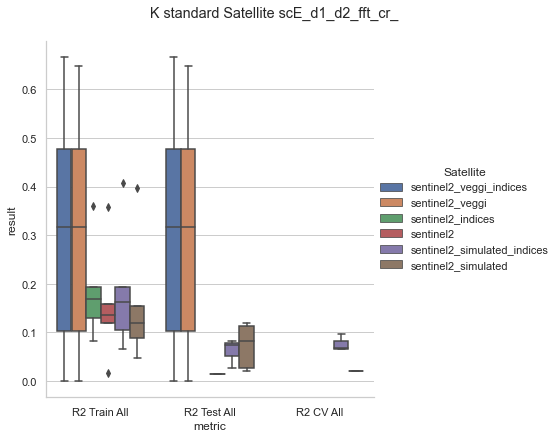

property_: Na


Empty DataFrame
Columns: [Satellite, Scaler, Features, Property, Model, result, metric]
Index: []

(31, 7)


Satellite    Scaler           Features Property  Model  result  \
50    sentinel2_indices  standard  scE_d1_d2_fft_cr_       Na  LASSO  -0.003   
59            sentinel2  standard  scE_d1_d2_fft_cr_       Na     LR  -0.010   
42  sentinel2_simulated  standard  scE_d1_d2_fft_cr_       Na     RF  -0.014   

         metric  
50  R2 Test All  
59  R2 Test All  
42  R2 Test All

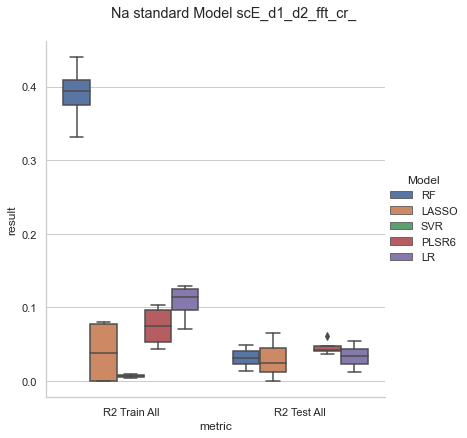

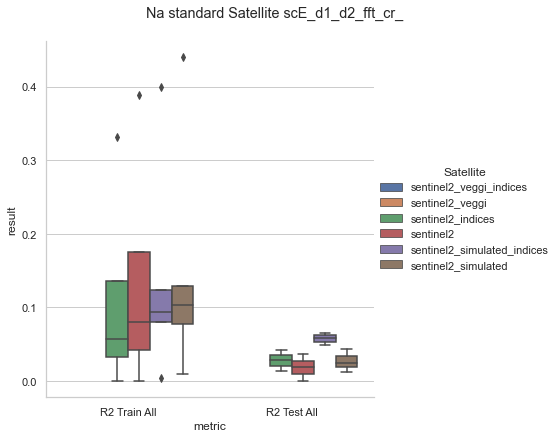

feature: scE_d1_d2_fft_
property_: pH


Satellite    Scaler        Features Property  Model  result  \
30  sentinel2_simulated  standard  scE_d1_d2_fft_       pH     LR   0.633   
31  sentinel2_simulated  standard  scE_d1_d2_fft_       pH  PLSR6   0.632   
32  sentinel2_simulated  standard  scE_d1_d2_fft_       pH  LASSO   0.629   

       metric  
30  R2 CV All  
31  R2 CV All  
32  R2 CV All

(21, 7)


Satellite    Scaler        Features Property  Model  result  \
43  sentinel2_indices  standard  scE_d1_d2_fft_       pH  LASSO  -0.016   
44          sentinel2  standard  scE_d1_d2_fft_       pH    SVR  -0.062   
45          sentinel2  standard  scE_d1_d2_fft_       pH     LR  -0.067   

       metric  
43  R2 CV All  
44  R2 CV All  
45  R2 CV All

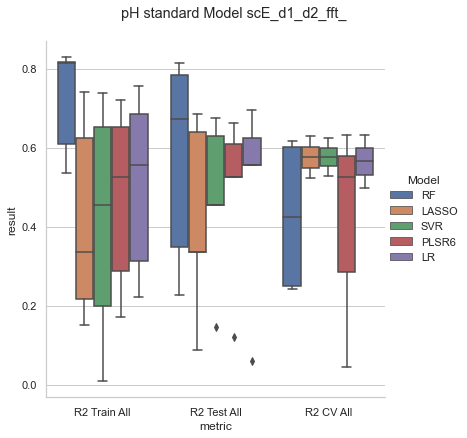

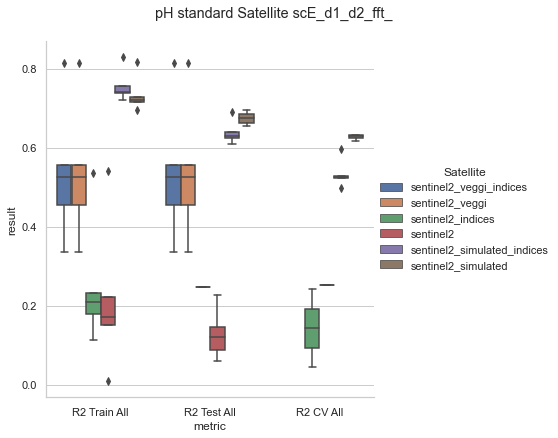

property_: OM


Satellite    Scaler        Features Property  Model  result  \
30  sentinel2_simulated  standard  scE_d1_d2_fft_       OM    SVR   0.327   
31  sentinel2_simulated  standard  scE_d1_d2_fft_       OM  LASSO   0.318   
32  sentinel2_simulated  standard  scE_d1_d2_fft_       OM     LR   0.316   

       metric  
30  R2 CV All  
31  R2 CV All  
32  R2 CV All

(31, 7)


Satellite    Scaler        Features Property  Model  result        metric
40  sentinel2  standard  scE_d1_d2_fft_       OM  LASSO  -0.014     R2 CV All
70  sentinel2  standard  scE_d1_d2_fft_       OM  LASSO  -0.015   R2 Test All
15  sentinel2  standard  scE_d1_d2_fft_       OM    SVR  -0.016  R2 Train All

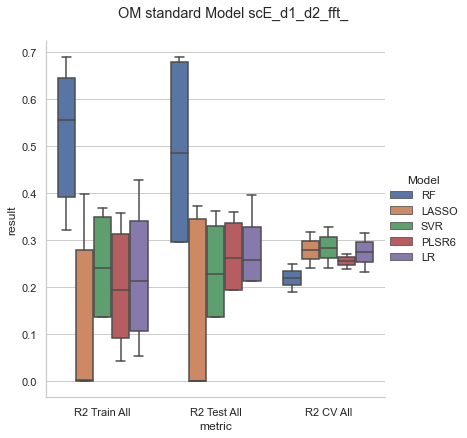

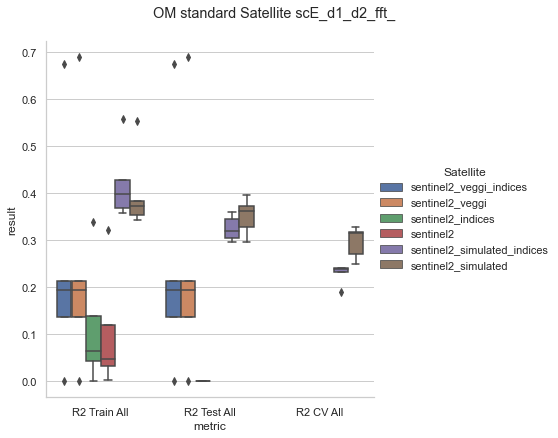

property_: Ca


Satellite    Scaler        Features Property  Model  \
30  sentinel2_simulated_indices  standard  scE_d1_d2_fft_       Ca     RF   
31  sentinel2_simulated_indices  standard  scE_d1_d2_fft_       Ca    SVR   
32  sentinel2_simulated_indices  standard  scE_d1_d2_fft_       Ca  LASSO   

    result     metric  
30   0.440  R2 CV All  
31   0.391  R2 CV All  
32   0.379  R2 CV All

(22, 7)


Satellite    Scaler        Features Property  Model  result  \
16  sentinel2_indices  standard  scE_d1_d2_fft_       Ca    SVR  -0.005   
44  sentinel2_indices  standard  scE_d1_d2_fft_       Ca  LASSO  -0.014   
45  sentinel2_indices  standard  scE_d1_d2_fft_       Ca     LR  -0.033   

          metric  
16  R2 Train All  
44     R2 CV All  
45     R2 CV All

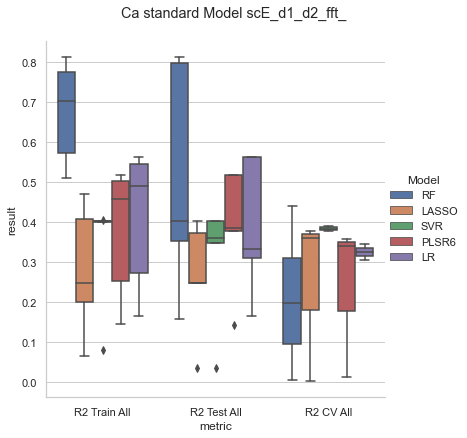

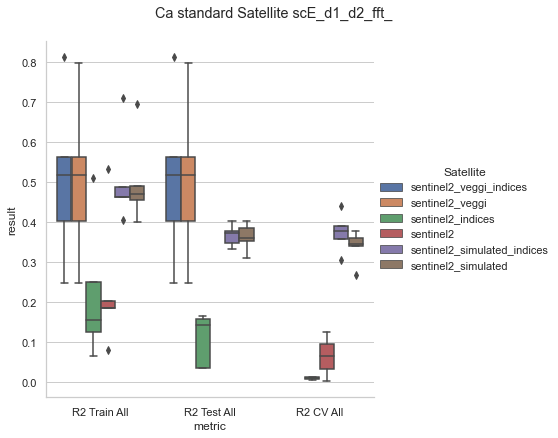

property_: Mg


Satellite    Scaler        Features Property  Model  result  \
30  sentinel2_simulated  standard  scE_d1_d2_fft_       Mg  LASSO   0.294   
31  sentinel2_simulated  standard  scE_d1_d2_fft_       Mg  PLSR6   0.292   
32  sentinel2_simulated  standard  scE_d1_d2_fft_       Mg    SVR   0.287   

       metric  
30  R2 CV All  
31  R2 CV All  
32  R2 CV All

(25, 7)


Satellite    Scaler        Features Property  Model  result  \
13  sentinel2_indices  standard  scE_d1_d2_fft_       Mg    SVR  -0.004   
40          sentinel2  standard  scE_d1_d2_fft_       Mg  LASSO  -0.027   
41  sentinel2_indices  standard  scE_d1_d2_fft_       Mg  LASSO  -0.031   

          metric  
13  R2 Train All  
40     R2 CV All  
41     R2 CV All

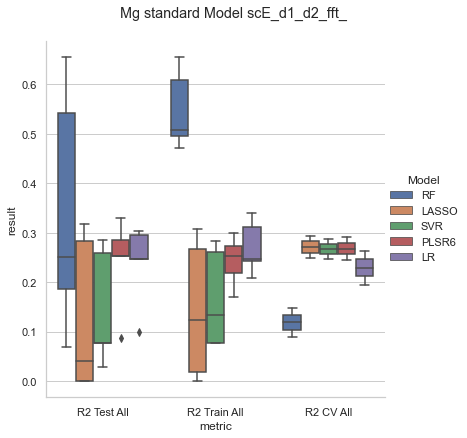

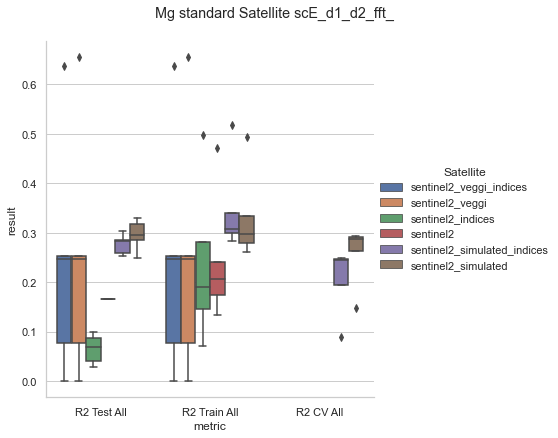

property_: K


Satellite    Scaler        Features Property  Model  result     metric
30  sentinel2  standard  scE_d1_d2_fft_        K    SVR   0.049  R2 CV All
31  sentinel2  standard  scE_d1_d2_fft_        K  LASSO   0.042  R2 CV All

(35, 7)


Satellite    Scaler        Features Property Model  result  \
73  sentinel2_indices  standard  scE_d1_d2_fft_        K    RF  -0.019   
0           sentinel2  standard  scE_d1_d2_fft_        K   SVR  -0.031   
80  sentinel2_indices  standard  scE_d1_d2_fft_        K    LR  -0.031   

          metric  
73   R2 Test All  
0   R2 Train All  
80   R2 Test All

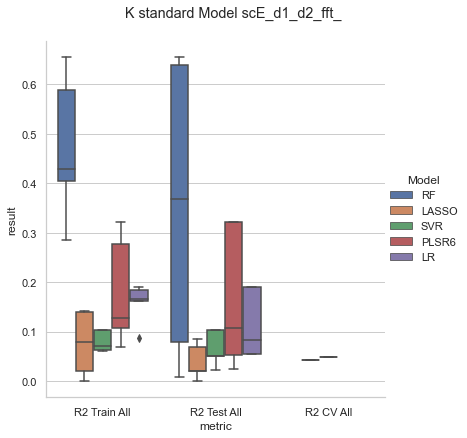

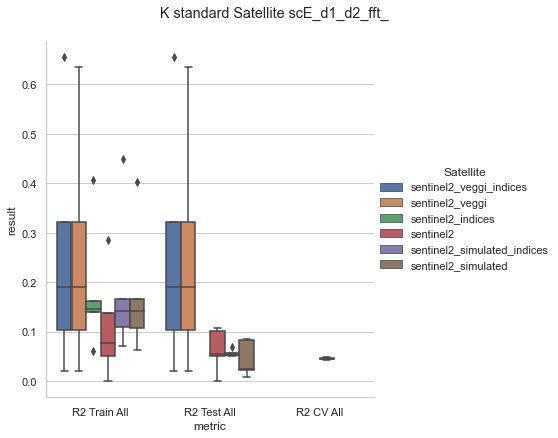

property_: Na


Satellite    Scaler        Features Property  Model  \
20  sentinel2_simulated_indices  standard  scE_d1_d2_fft_       Na  LASSO   

    result     metric  
20   0.027  R2 CV All

(29, 7)


Satellite    Scaler        Features Property  Model  \
57            sentinel2_indices  standard  scE_d1_d2_fft_       Na     LR   
43  sentinel2_simulated_indices  standard  scE_d1_d2_fft_       Na    SVR   
21  sentinel2_simulated_indices  standard  scE_d1_d2_fft_       Na  PLSR6   

    result       metric  
57  -0.004  R2 Test All  
43  -0.012  R2 Test All  
21  -0.018    R2 CV All

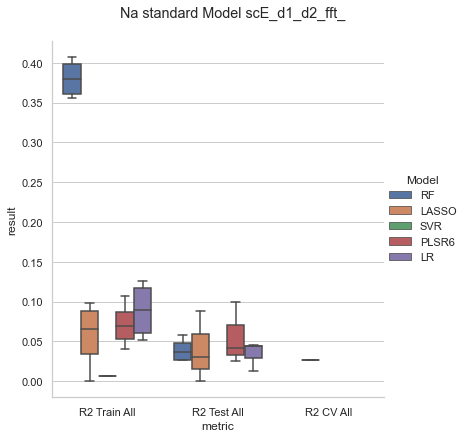

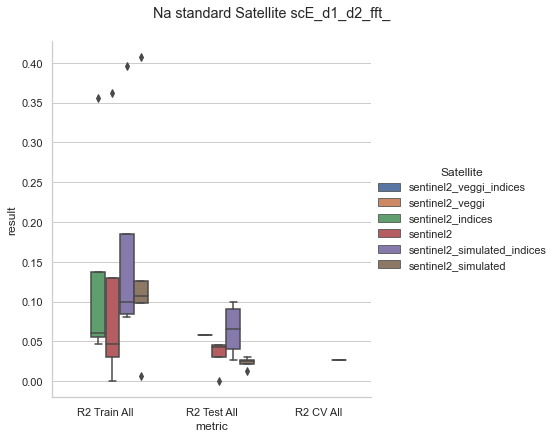

feature: scE_d1_d2_
property_: pH


Satellite    Scaler    Features Property  Model  result  \
30  sentinel2_simulated_indices  standard  scE_d1_d2_       pH     LR   0.673   
31  sentinel2_simulated_indices  standard  scE_d1_d2_       pH  LASSO   0.671   
32  sentinel2_simulated_indices  standard  scE_d1_d2_       pH    SVR   0.652   

       metric  
30  R2 CV All  
31  R2 CV All  
32  R2 CV All

(23, 7)


Satellite    Scaler    Features Property  Model  result     metric
42  sentinel2  standard  scE_d1_d2_       pH  PLSR6  -0.009  R2 CV All
43  sentinel2  standard  scE_d1_d2_       pH  LASSO  -0.012  R2 CV All
44  sentinel2  standard  scE_d1_d2_       pH     LR  -0.017  R2 CV All

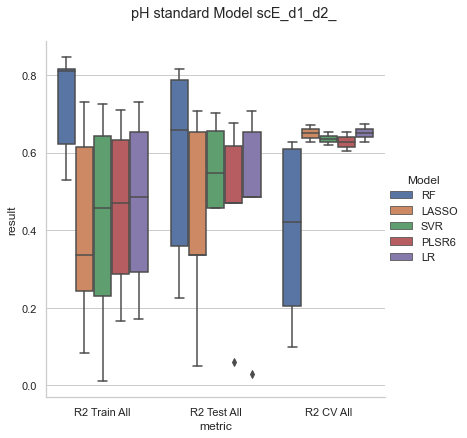

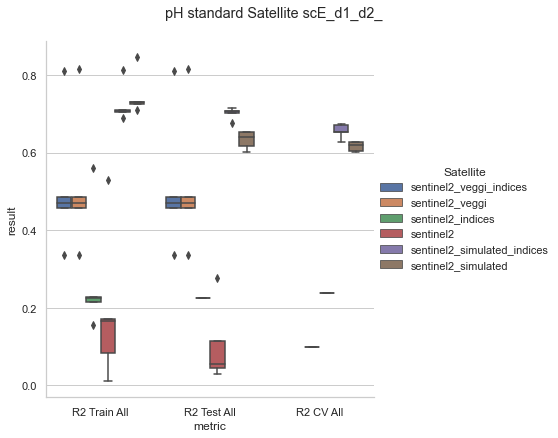

property_: OM


Satellite    Scaler    Features Property  Model  result  \
30  sentinel2_simulated_indices  standard  scE_d1_d2_       OM    SVR   0.329   
31  sentinel2_simulated_indices  standard  scE_d1_d2_       OM     LR   0.323   
32  sentinel2_simulated_indices  standard  scE_d1_d2_       OM  LASSO   0.303   

       metric  
30  R2 CV All  
31  R2 CV All  
32  R2 CV All

(31, 7)


Satellite    Scaler    Features Property  Model  result  \
40  sentinel2_indices  standard  scE_d1_d2_       OM     RF  -0.002   
73          sentinel2  standard  scE_d1_d2_       OM  LASSO  -0.015   
19  sentinel2_indices  standard  scE_d1_d2_       OM    SVR  -0.016   

          metric  
40     R2 CV All  
73   R2 Test All  
19  R2 Train All

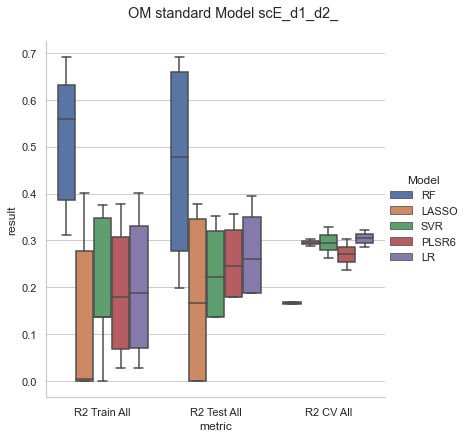

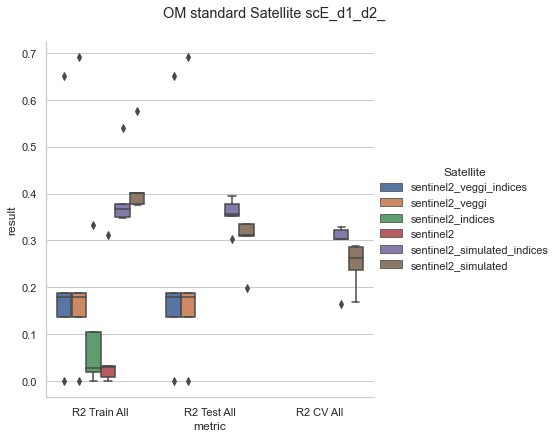

property_: Ca


Satellite    Scaler    Features Property  Model  result  \
30  sentinel2_simulated_indices  standard  scE_d1_d2_       Ca  LASSO   0.433   
31  sentinel2_simulated_indices  standard  scE_d1_d2_       Ca    SVR   0.418   
32  sentinel2_simulated_indices  standard  scE_d1_d2_       Ca     LR   0.415   

       metric  
30  R2 CV All  
31  R2 CV All  
32  R2 CV All

(22, 7)


Satellite    Scaler    Features Property  Model  result  \
11  sentinel2_indices  standard  scE_d1_d2_       Ca    SVR  -0.002   
43  sentinel2_indices  standard  scE_d1_d2_       Ca  LASSO  -0.011   
44          sentinel2  standard  scE_d1_d2_       Ca  LASSO  -0.032   

          metric  
11  R2 Train All  
43     R2 CV All  
44     R2 CV All

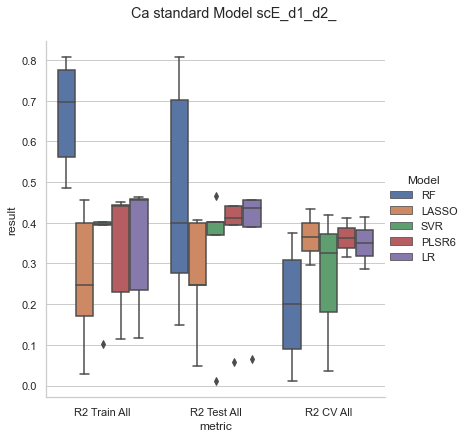

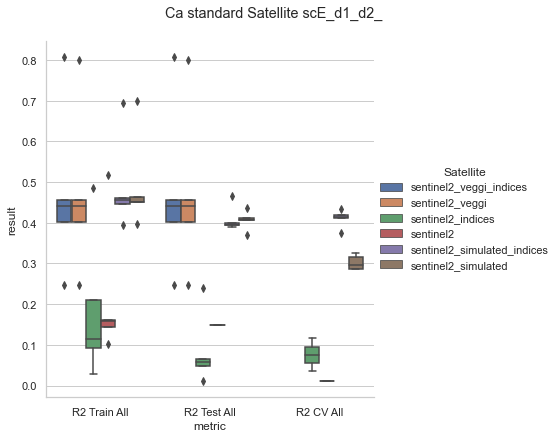

property_: Mg


Satellite    Scaler    Features Property  Model  result  \
30  sentinel2_simulated  standard  scE_d1_d2_       Mg  PLSR6   0.230   
31  sentinel2_simulated  standard  scE_d1_d2_       Mg  LASSO   0.219   
32  sentinel2_simulated  standard  scE_d1_d2_       Mg     LR   0.217   

       metric  
30  R2 CV All  
31  R2 CV All  
32  R2 CV All

(20, 7)


Satellite    Scaler    Features Property Model  result  \
41  sentinel2_indices  standard  scE_d1_d2_       Mg   SVR  -0.023   
19          sentinel2  standard  scE_d1_d2_       Mg   SVR  -0.035   
42  sentinel2_indices  standard  scE_d1_d2_       Mg    RF  -0.070   

          metric  
41     R2 CV All  
19  R2 Train All  
42     R2 CV All

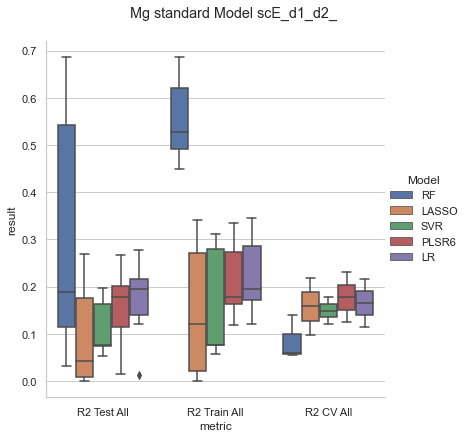

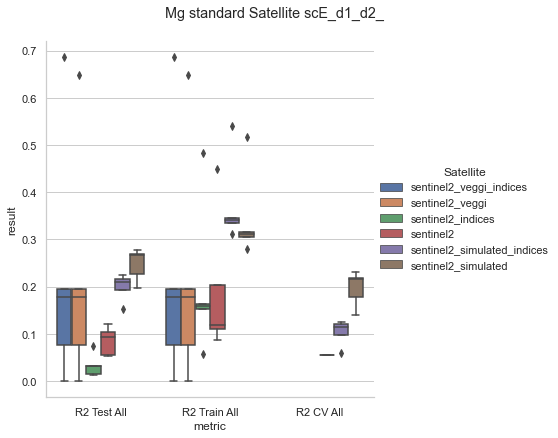

property_: K


Satellite    Scaler    Features Property Model  result  \
30                    sentinel2  standard  scE_d1_d2_        K   SVR    0.02   
31  sentinel2_simulated_indices  standard  scE_d1_d2_        K   SVR    0.01   

       metric  
30  R2 CV All  
31  R2 CV All

(37, 7)


Satellite    Scaler    Features Property Model  result  \
76  sentinel2_simulated_indices  standard  scE_d1_d2_        K    RF  -0.004   
0                     sentinel2  standard  scE_d1_d2_        K   SVR  -0.005   
32  sentinel2_simulated_indices  standard  scE_d1_d2_        K    LR  -0.008   

          metric  
76   R2 Test All  
0   R2 Train All  
32     R2 CV All

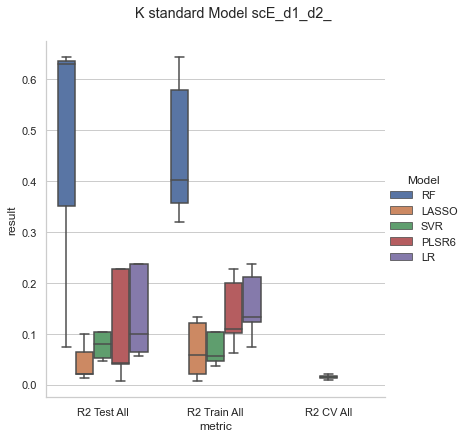

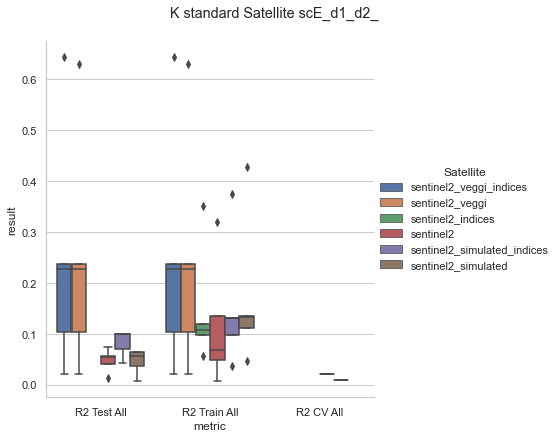

property_: Na


Empty DataFrame
Columns: [Satellite, Scaler, Features, Property, Model, result, metric]
Index: []

(35, 7)


Satellite    Scaler    Features Property  Model  result  \
6   sentinel2_simulated  standard  scE_d1_d2_       Na    SVR  -0.004   
45            sentinel2  standard  scE_d1_d2_       Na  LASSO  -0.005   
51            sentinel2  standard  scE_d1_d2_       Na     LR  -0.006   

          metric  
6   R2 Train All  
45   R2 Test All  
51   R2 Test All

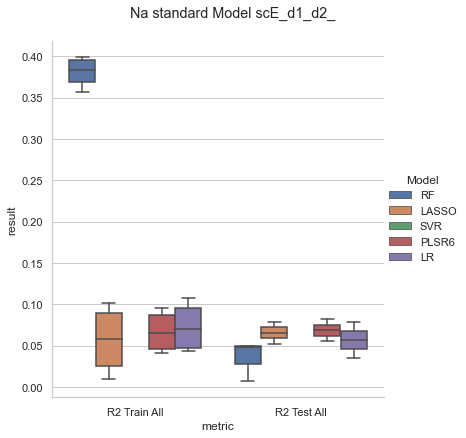

In [4]:
columns_ = [
#     ['CC Train All', 'CC Test All'],
#     ['MSE Train All', 'MSE CV All', 'MSE Test All'],
    ['R2 Train All', 'R2 CV All', 'R2 Test All'],
#     ['EV Train All', 'EV CV All', 'EV Test All']
]
all_text_columns = []

for columns in columns_:
    text_col = "_".join([i.replace(' ', '_') for i in columns]).lower()
    all_text_columns.append(text_col)
    for scaler in scalers:
        print(f"scaler: {scaler}")

        for feature in features:
            print(f"feature: {feature}")

            for property_ in properties:
                print(f"property_: {property_}")

                df_temp = read_metrics(scaler, feature, property_)
                all_df_temp = join_results_unpivot_metrics(columns)
                all_df_temp_ = filter_data(all_df_temp)

                for i in ['Model', 'Satellite']:
                    ax = sns.catplot(
                        x="metric", y="result", hue=i,
                        data=all_df_temp_, kind="box",
                        height=6, aspect=.9,
                        hue_order=satellites if i == 'Satellite' else models
                    )

                    find_route = f"../reports/figures/{text_col}/{scaler}/{feature}"
                    check_path(find_route)

                    ax.fig.subplots_adjust(top=0.9)
                    ax.fig.suptitle(f"{property_} {scaler} {i} {feature}")
#                     ax.savefig(f"{find_route}/results_as_boxplots_for_{property_}_{i.lower()}s.png")
    #                 print(f"{find_route}/results_as_boxplots_for_{property_}_{i}.png")
                    plt.show(ax)


In [5]:
import cv2

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [6]:
ls "../reports/figures/r2_train_all_r2_cv_all_r2_test_all/minmax/scE_d1_d2_"

 El volumen de la unidad C es Windows
 El n£mero de serie del volumen es: CAD2-CEC1

 Directorio de C:\Users\camil\codes\tesis\reports\figures\r2_train_all_r2_cv_all_r2_test_all\minmax\scE_d1_d2_

25/04/2021  04:02 a.ÿm.    <DIR>          .
25/04/2021  04:02 a.ÿm.    <DIR>          ..
30/04/2021  01:46 a.ÿm.            18.275 results_as_boxplots_for_Ca_models.png
30/04/2021  01:46 a.ÿm.            31.788 results_as_boxplots_for_Ca_satellites.png
30/04/2021  01:46 a.ÿm.            17.463 results_as_boxplots_for_K_models.png
30/04/2021  01:46 a.ÿm.            30.780 results_as_boxplots_for_K_satellites.png
30/04/2021  01:46 a.ÿm.            19.057 results_as_boxplots_for_Mg_models.png
30/04/2021  01:46 a.ÿm.            33.231 results_as_boxplots_for_Mg_satellites.png
30/04/2021  01:46 a.ÿm.            17.603 results_as_boxplots_for_Na_models.png
30/04/2021  01:46 a.ÿm.            30.026 results_as_boxplots_for_Na_satellites.png
30/04/2021  01:46 a.ÿm.            18.979 results_as_boxplot

In [7]:
all_text_columns

['cc_train_all_cc_test_all',
 'mse_train_all_mse_cv_all_mse_test_all',
 'r2_train_all_r2_cv_all_r2_test_all',
 'ev_train_all_ev_cv_all_ev_test_all']

In [8]:
for cols, tt in zip(all_text_columns, ['correlation_coefficient', 'MSE', 'R2', 'explain_variance']):
    print(cols)
    print(tt)
    for i in ['Model', 'Satellite']:
        i_ = i.lower()

        for property_ in properties:
        #     print(f"property_: {property_}")

            imgs = []
            for scaler in scalers:
        #         print(f"scaler: {scaler}")

                for feature in features:
        #             print(f"feature: {feature}")

                    path = (
                        f'../reports/figures/{cols}/{scaler}/{feature}/' +
                        f'results_as_boxplots_for_{property_}_{i_}s.png'
                    )
                    img = cv2.imread(path)
        #             print(img is None)
                    imgs.append(img)


            fig = plt.figure(figsize=(25, 25))
            fig.suptitle(f'{property_}_result_{tt}_metric_{i_}s', y=0.9, fontsize=30)
            grid = ImageGrid(
                fig, 111,  # similar to subplot(111)
                nrows_ncols=(3, 3),  # creates 2x2 grid of axes
                axes_pad=0.1,  # pad between axes in inch.
            )

            for ax, im in zip(grid, imgs):
                # Iterating over the grid returns the Axes.
                ax.imshow(im)
                ax.grid(False)
                ax.set_xticks([])
                ax.set_yticks([])
        #     plt.title(f'{property_}_result_metrics')
            path = f'../reports/figures/{cols}/summarize_{i_}s/'
            check_path(path)
            plt.savefig(f'{path}/{property_}_result_metrics_{i_}s.png')
#             plt.show()
            plt.close()
plt.close('all')

cc_train_all_cc_test_all
correlation_coefficient
mse_train_all_mse_cv_all_mse_test_all
MSE
r2_train_all_r2_cv_all_r2_test_all
R2
ev_train_all_ev_cv_all_ev_test_all
explain_variance
